In [1]:
import clean, residual, run
import numpy as np
import matplotlib.pylab as plt
import re
import csv
from tables import open_file
from statistics import median, mode
from scipy.optimize import curve_fit, minimize
from math import acos, degrees, log
from matplotlib.colors import LogNorm

In [37]:
import imp
imp.reload(residual)
imp.reload(clean)

<module 'clean' from '/Users/MatthewMan/Desktop/UofA/Attenuation, Absorption, & Scattering/Analysis/clean.py'>

# -----------------------------------------------------------
# sDOM1 POSEIDON

In [127]:
filename = '20190426_085558_UTC_SDOM1_FLASH_POSEIDON1_P2_violet_both_2500Hz_20V_60s_19116085608.hld_up.hdf5'
a = clean.clean(filename)

percentage of high jumps in the file - 3.029756650211889


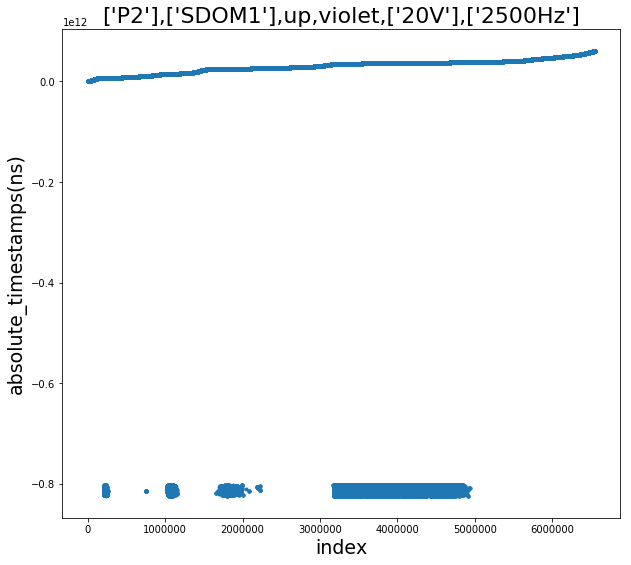

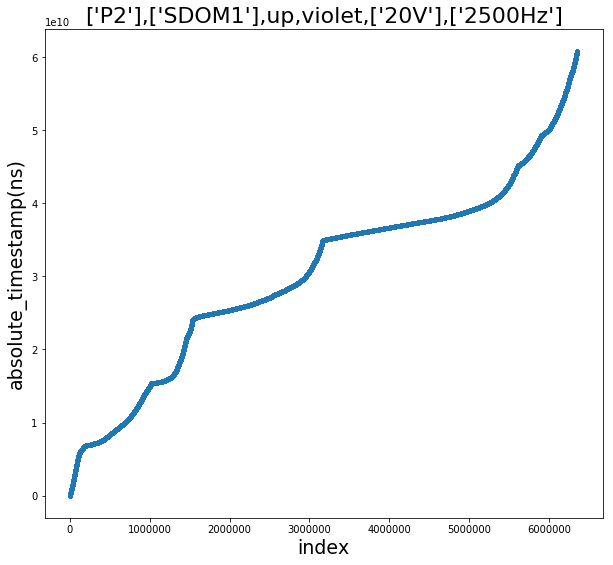

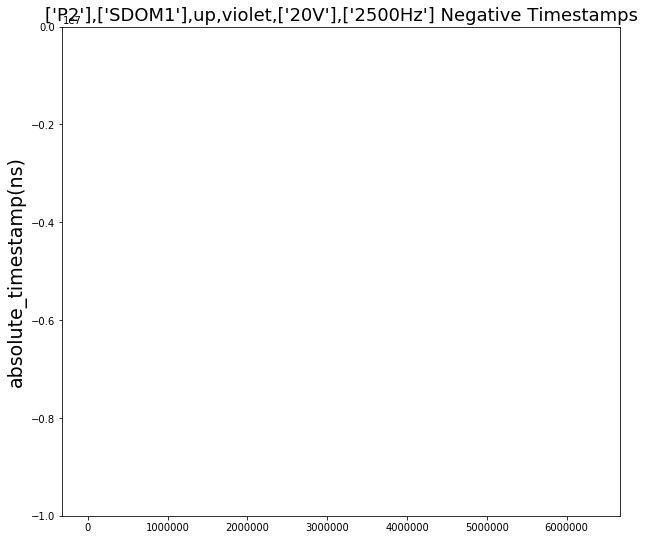

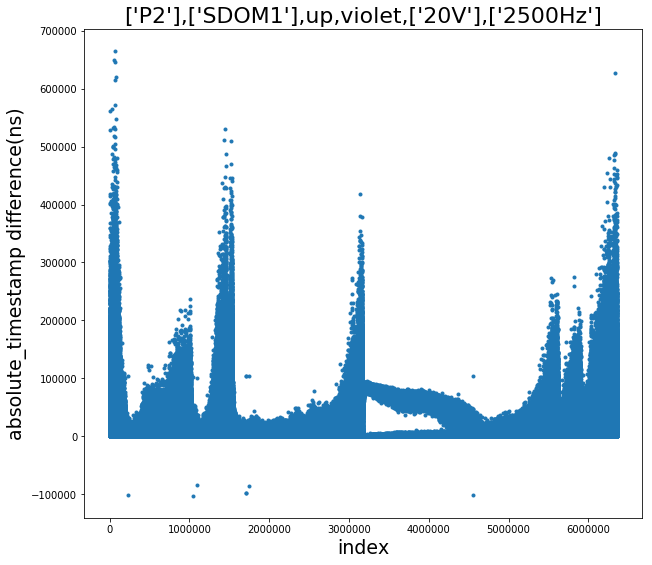

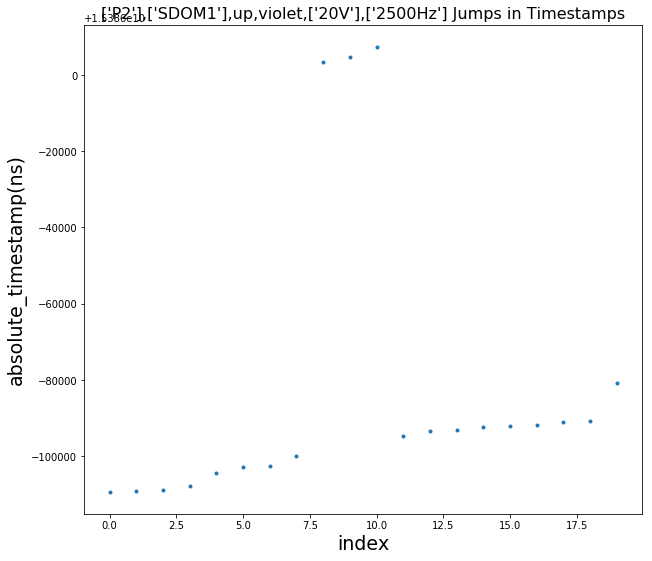

[ 230103.  230104. 1041308. 1041309. 1041310. 1101086. 1708941. 1708942.
 1713839. 1713840. 1749520. 1749521. 4548264. 4548265. 4548266.]


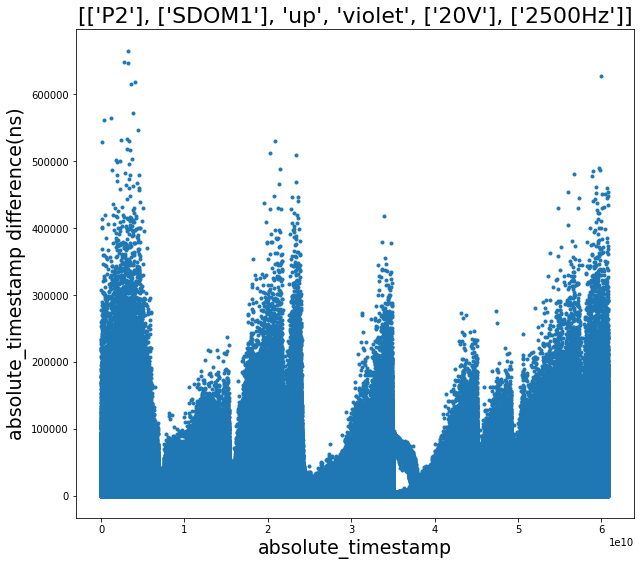

0.138071808682409


In [128]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = a.P_S_used()

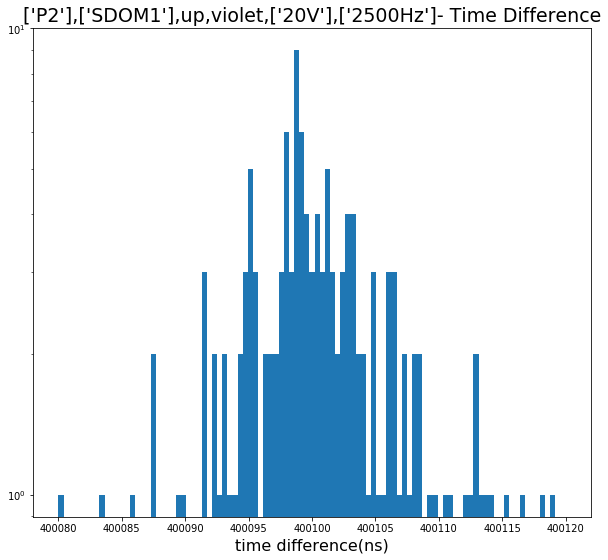

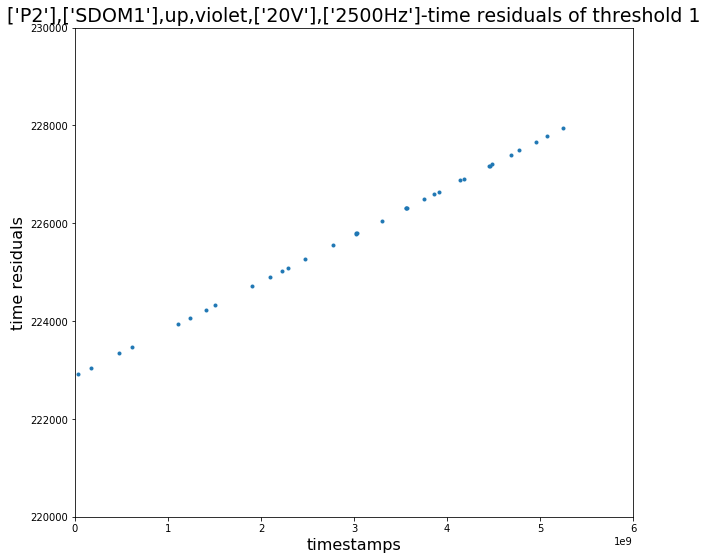

In [35]:
r1 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400105,
             0.0e10,0.6e10,220000, 230000, file_path, values, POCAM_num)

In [36]:
gaus_peak = r1.minimizer(0.0e10, 0.5e10)

400100.7156722718


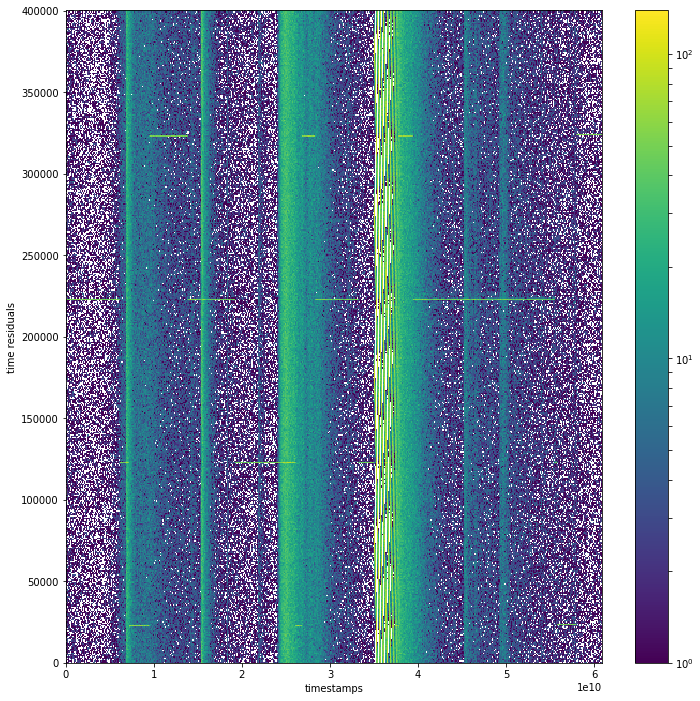

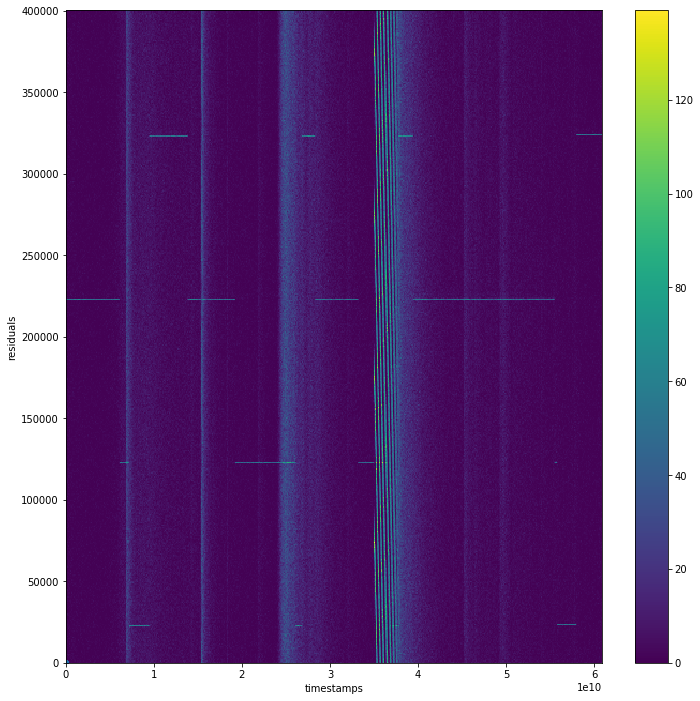

In [37]:
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r1.HIST2D(500, gaus_peak, SDOM_num)

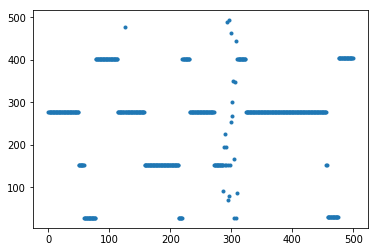

In [8]:
plt.plot(POCAM_bins, '.')

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:719: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


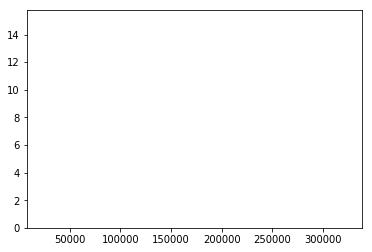

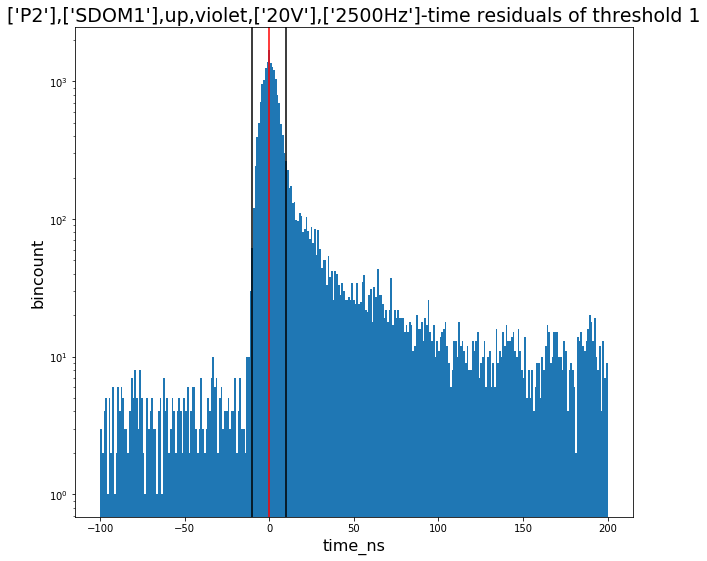

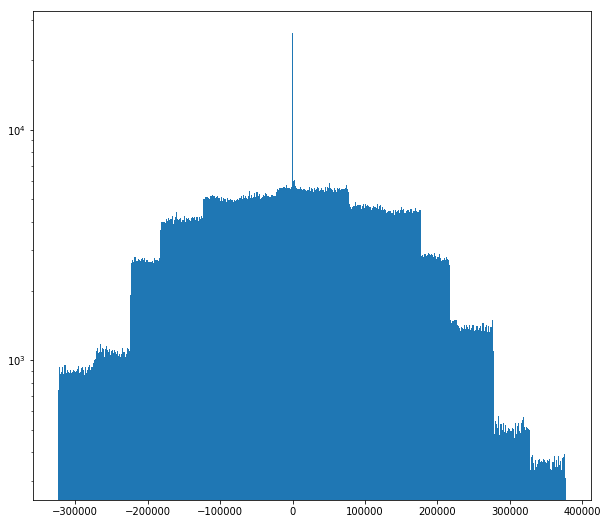

In [38]:
t_res_all1,num_events1, noise_events1 = r1.calc_res(BinsHist, 10, 2, 1)

Text(0,0.5,'time residuals')

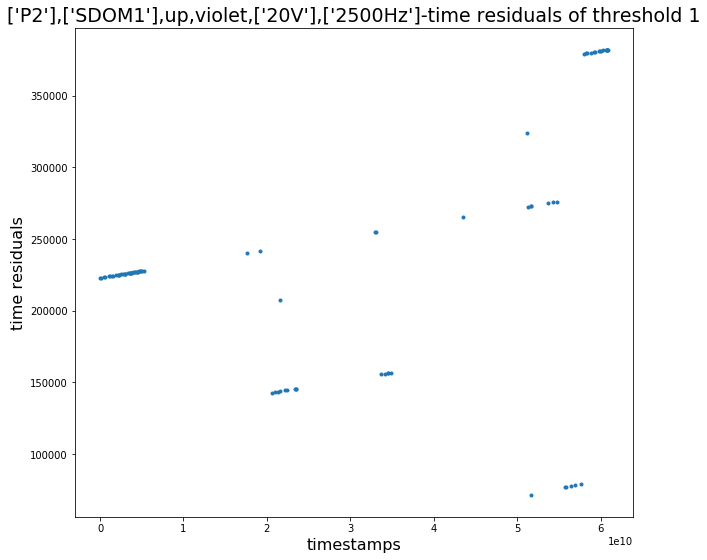

In [83]:
plt.figure(figsize=(10,9))
plt.plot(r1.events_in_peak, r1.estimate_residual, '.')
plt.title(values + '-time residuals of threshold 1', fontsize = 19)
plt.xlabel('timestamps', fontsize = 16)
plt.ylabel('time residuals', fontsize = 16)

83


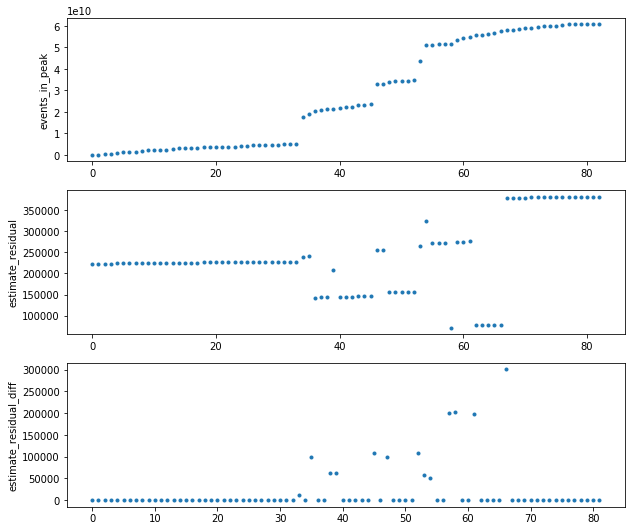

In [57]:
fig, ax = plt.subplots(nrows=3, figsize=(10,9))

ax[0].plot(r1.events_in_peak, '.')
ax[0].set_ylabel('events_in_peak')

ax[1].plot(r1.estimate_residual, '.')
ax[1].set_ylabel('estimate_residual')

ax[2].plot(abs(np.diff(r1.estimate_residual)), '.')
ax[2].set_ylabel('estimate_residual_diff')
#ax[2].set_ylim(-10,1000)


print(np.size(r1.estimate_residual))


83
jump_index [ 0.  1.  3.  7. 12. 17. 25. 33. 34. 35. 36. 37. 38. 39. 40. 42. 45. 47.
 48. 49. 51. 52. 53. 54. 55. 57. 58. 59. 60. 61. 63. 64. 65. 66. 67. 69.
 70. 72. 75. 76.]
jump_index size 40
index_p 0
Jump Indices 0 2
2


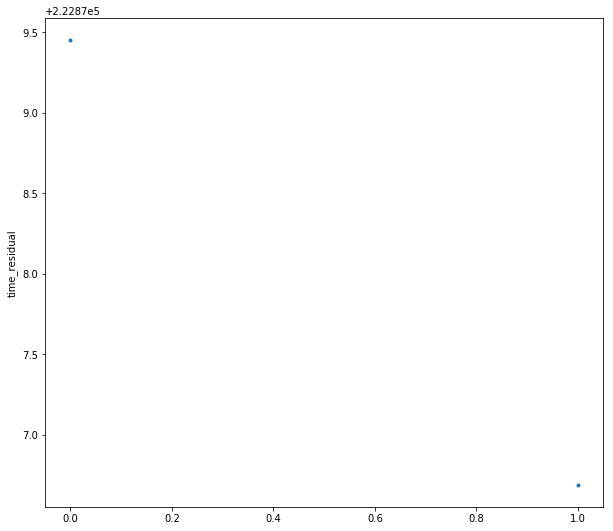

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:719: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


index_p 1
Jump Indices 2 4
2


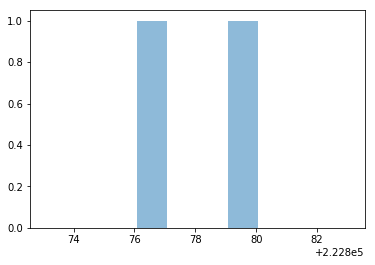

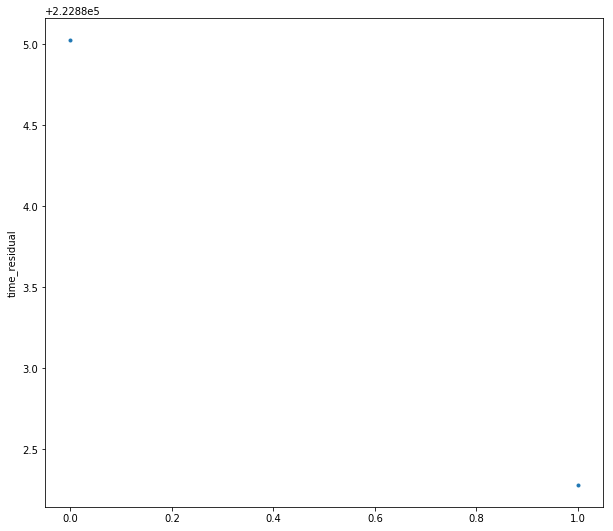

index_p 2
Jump Indices 4 8
4


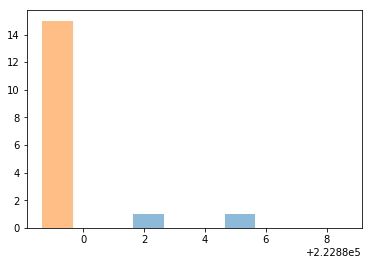

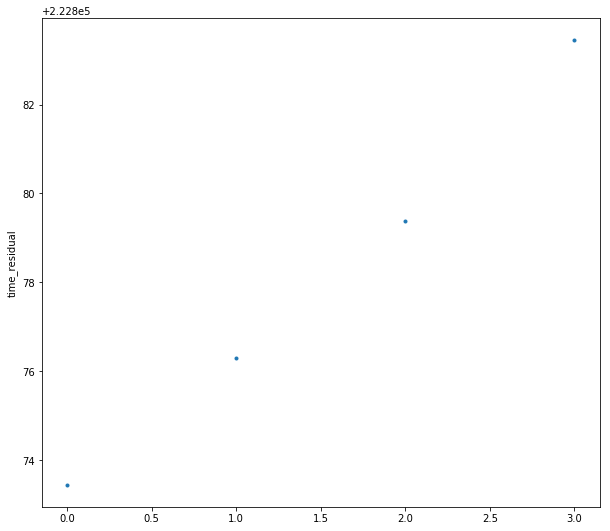

index_p 3
Jump Indices 8 13
5


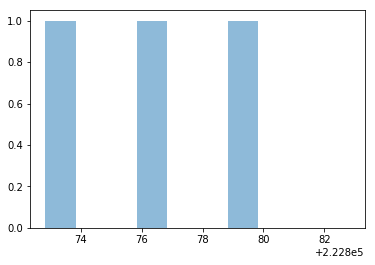

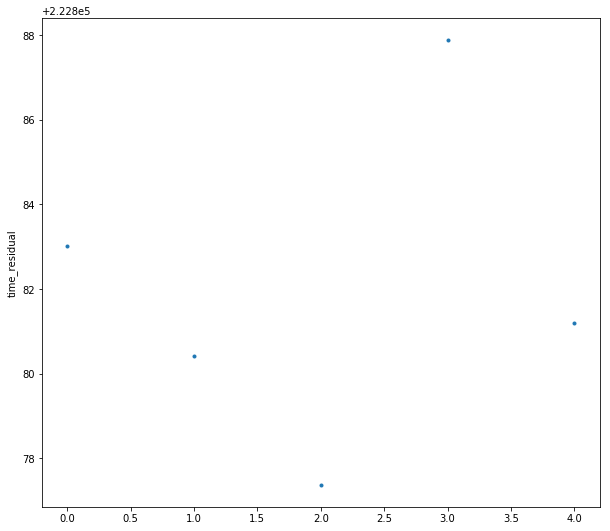

index_p 4
Jump Indices 13 18
5


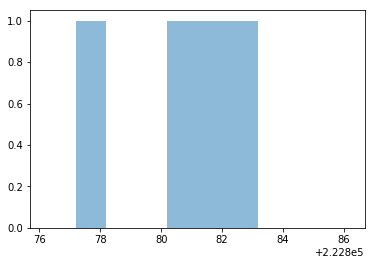

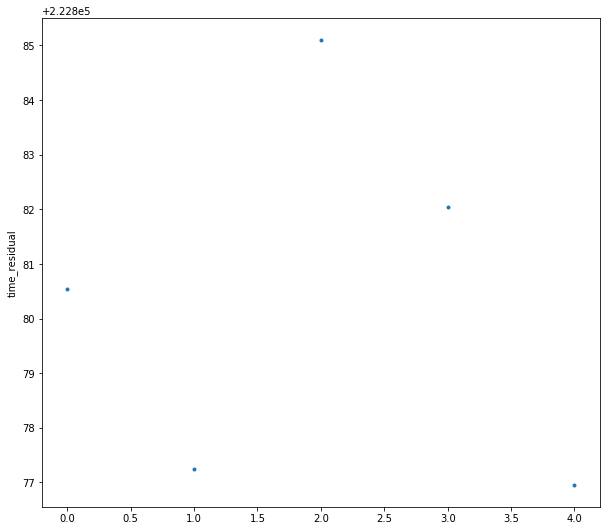

index_p 5
Jump Indices 18 26
8


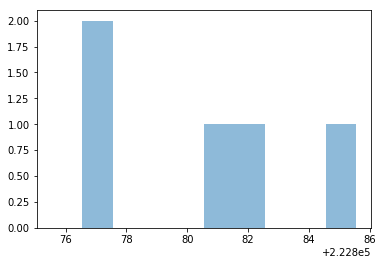

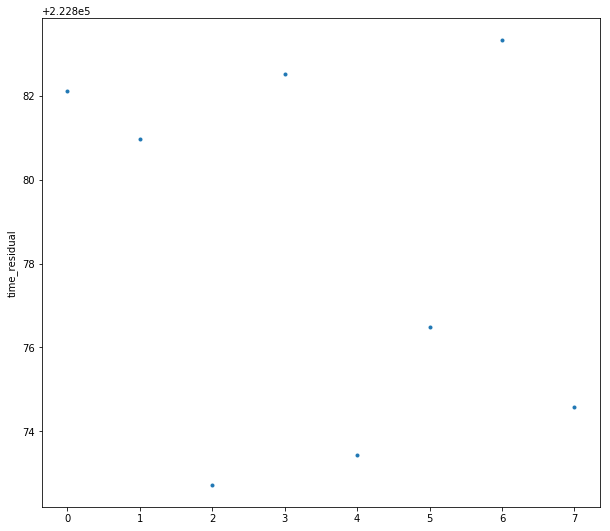

index_p 6
Jump Indices 26 34
8


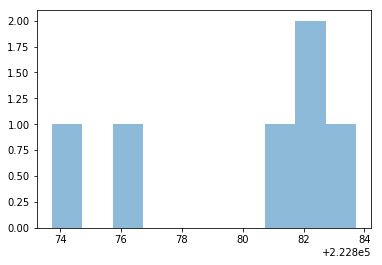

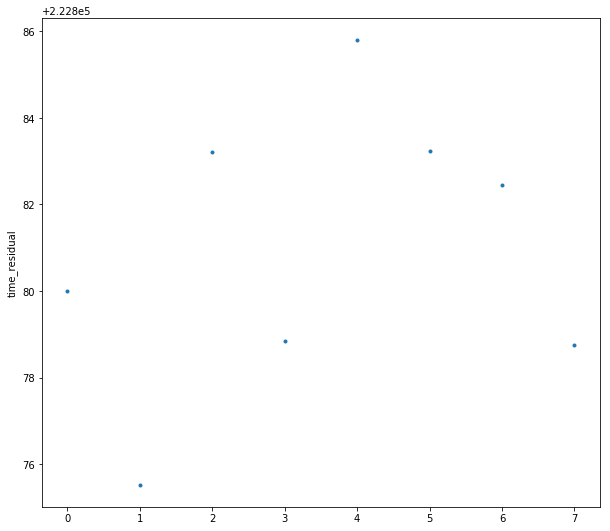

index_p 7
Jump Indices 34 35
1


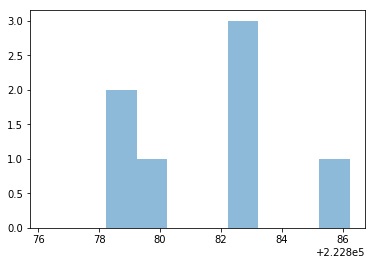

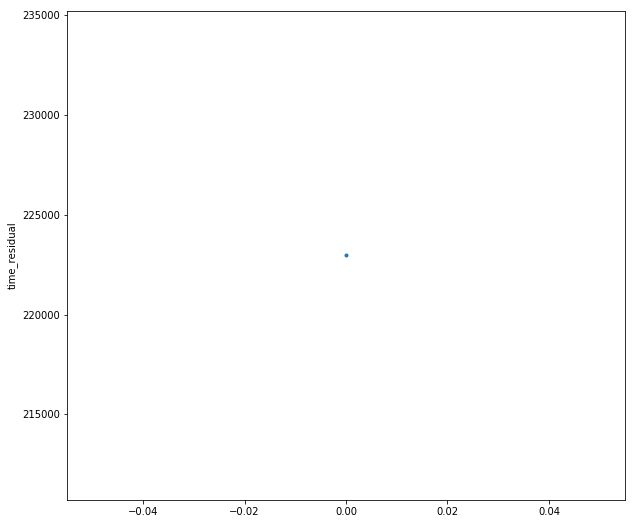

index_p 8
Jump Indices 35 36
1


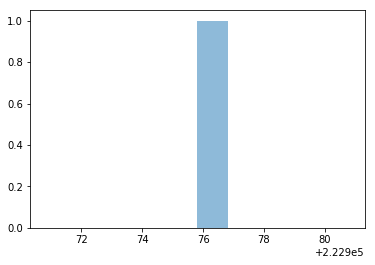

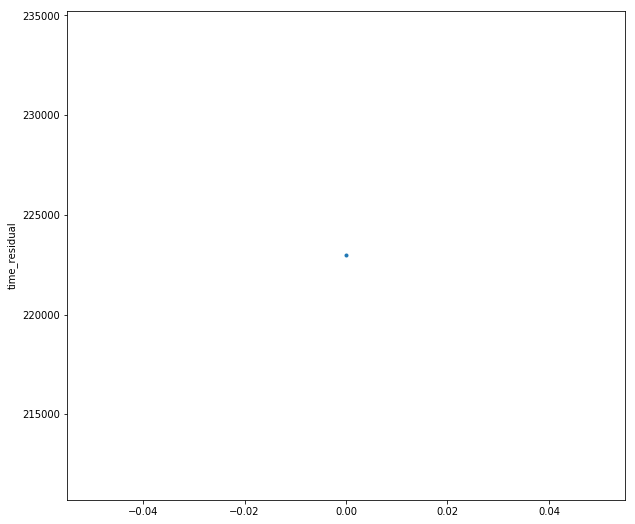

index_p 9
Jump Indices 36 37
1


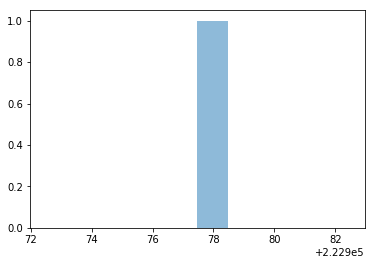

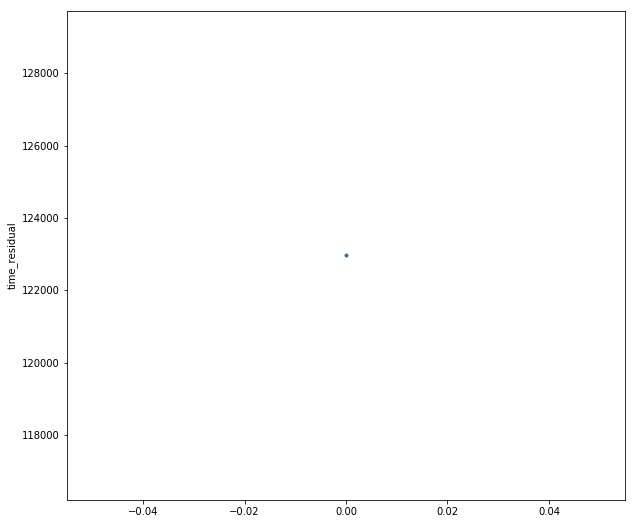

index_p 10
Jump Indices 37 38
1


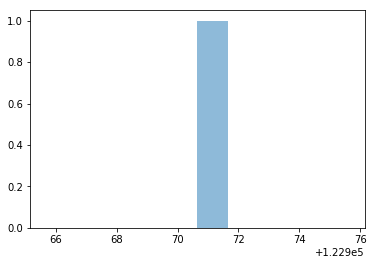

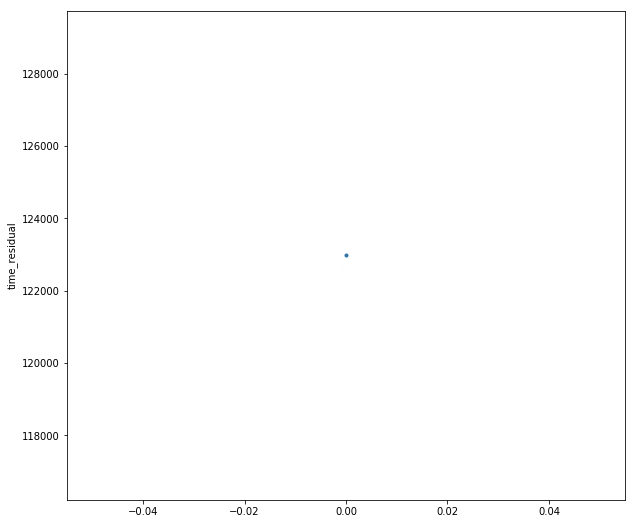

index_p 11
Jump Indices 38 39
1


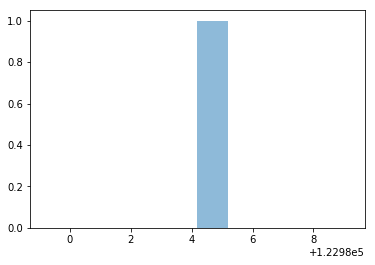

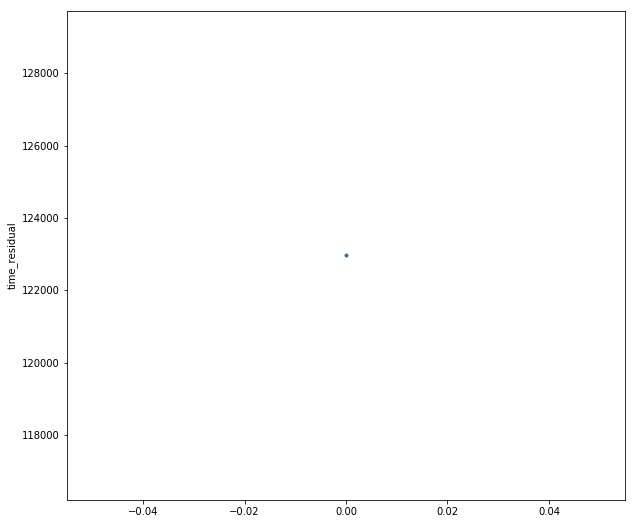

index_p 12
Jump Indices 39 40
1


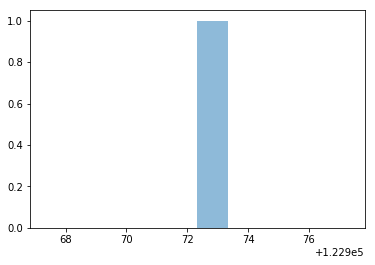

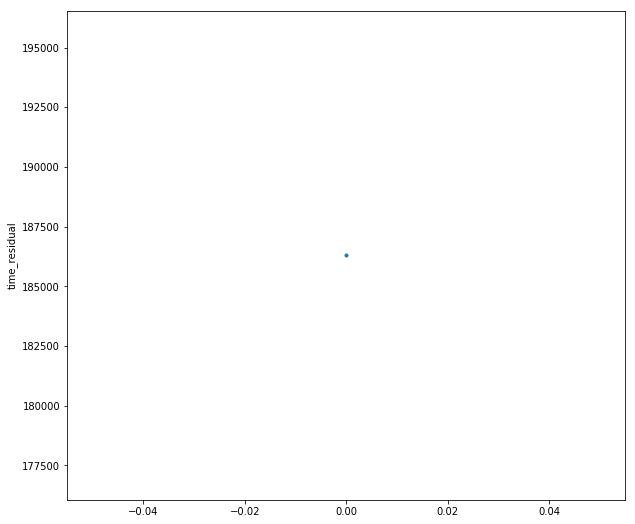

index_p 13
Jump Indices 40 41
1


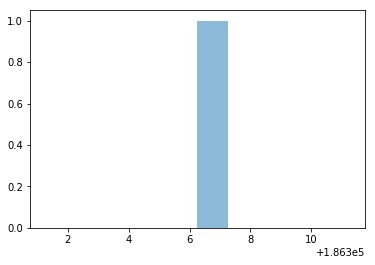

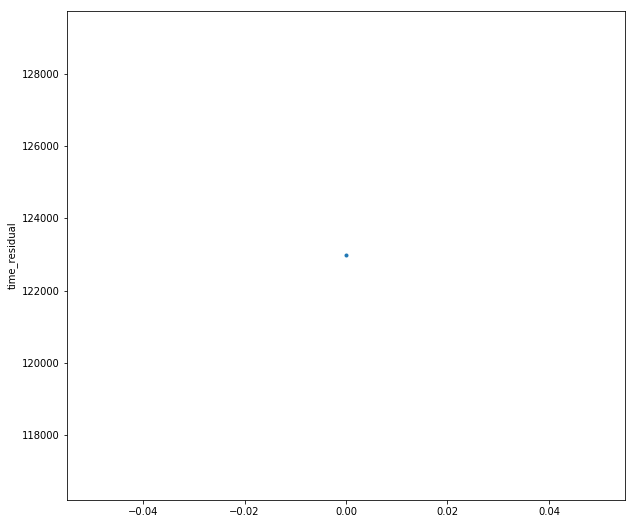

index_p 14
Jump Indices 41 43
2


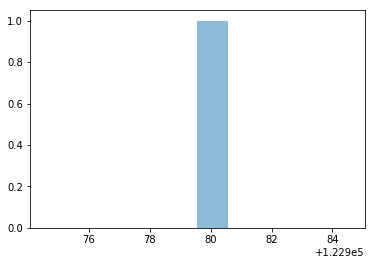

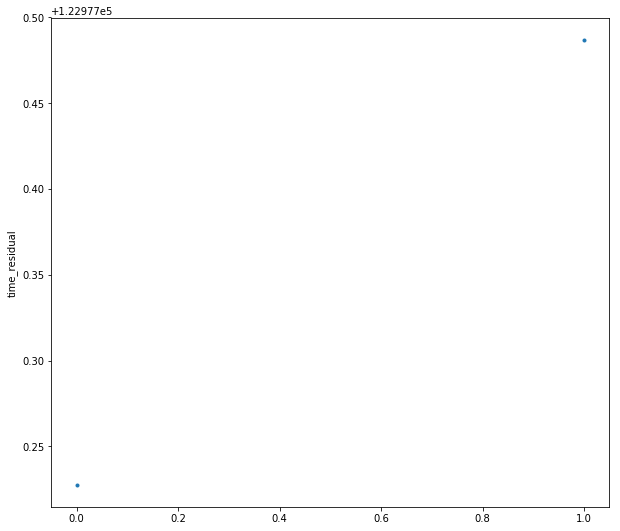

index_p 15
Jump Indices 43 46
3


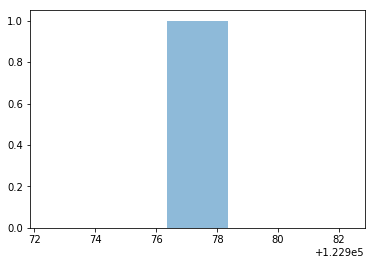

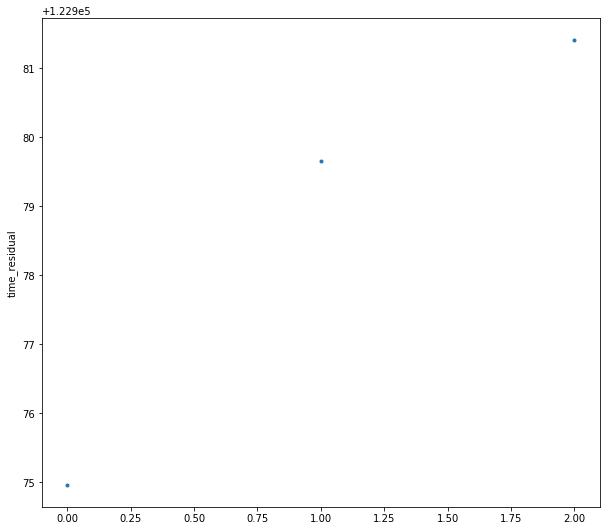

index_p 16
Jump Indices 46 48
2


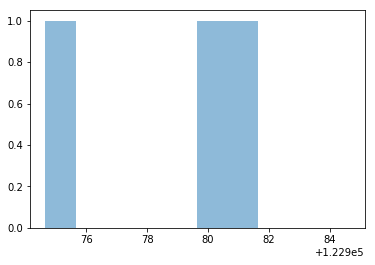

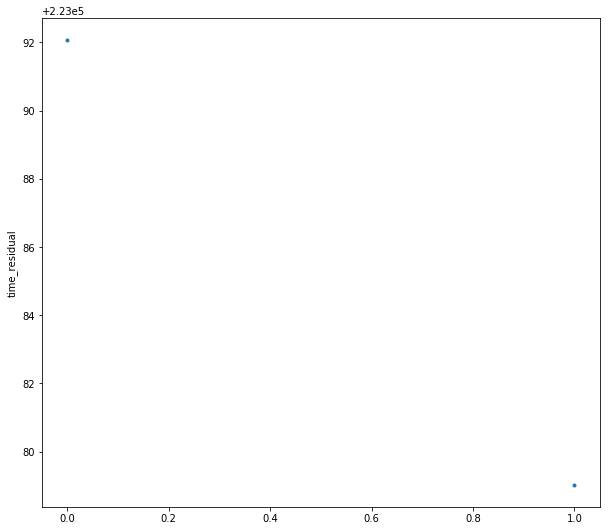

index_p 17
Jump Indices 48 49
1


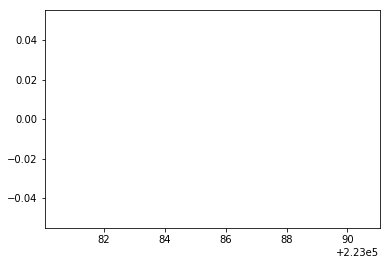

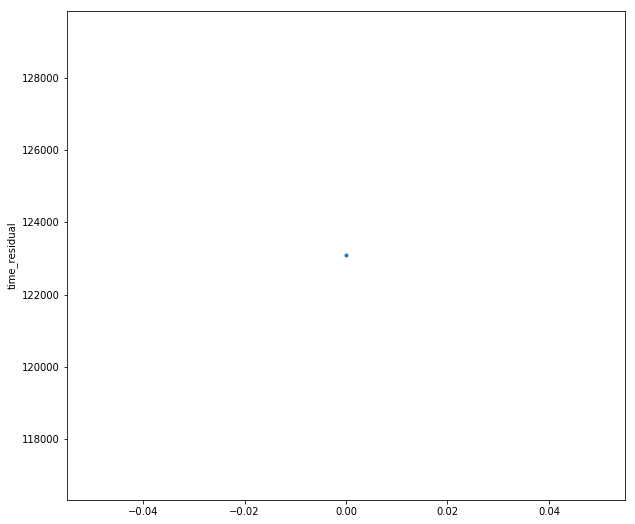

index_p 18
Jump Indices 49 50
1


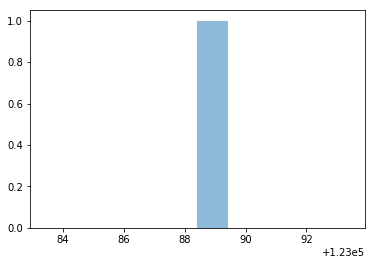

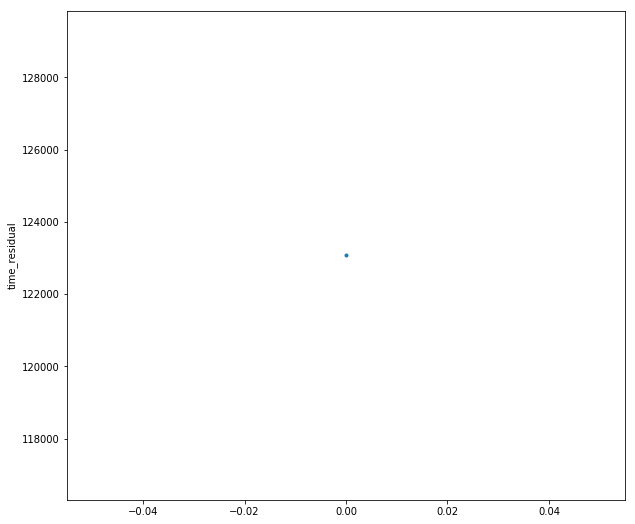

index_p 19
Jump Indices 50 52
2


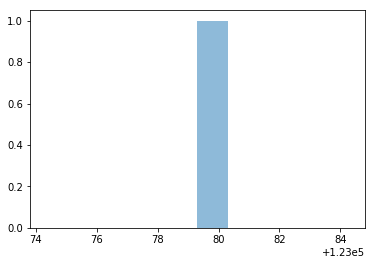

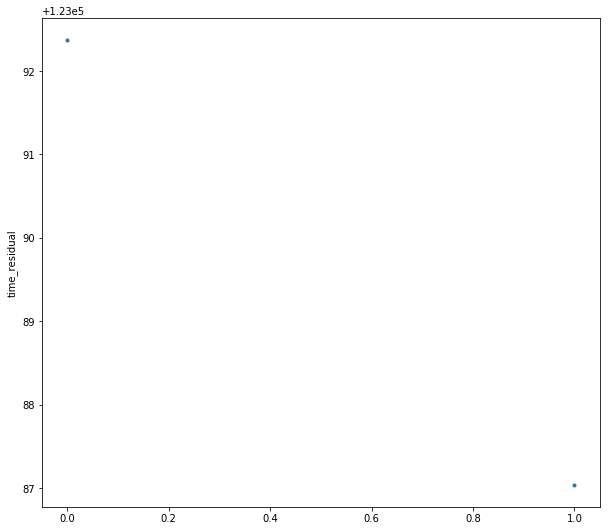

index_p 20
Jump Indices 52 53
1


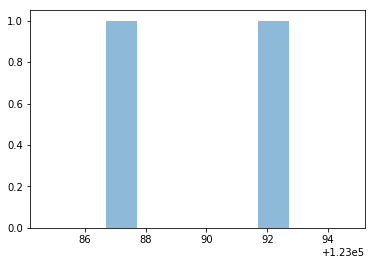

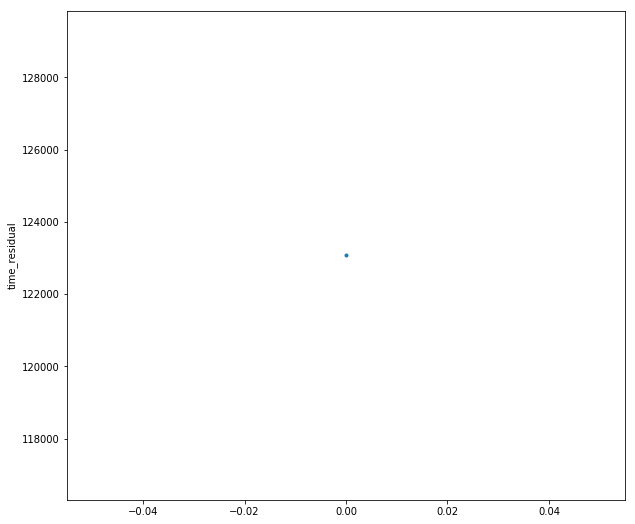

index_p 21
Jump Indices 53 54
1


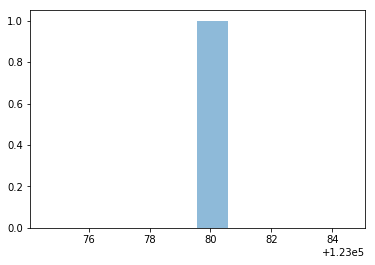

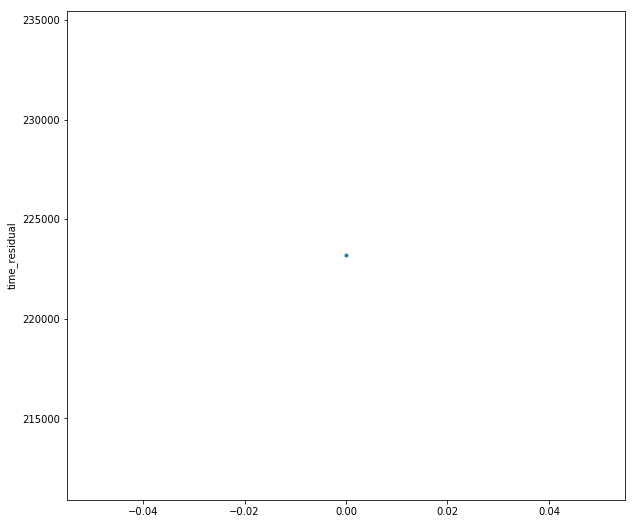

index_p 22
Jump Indices 54 55
1


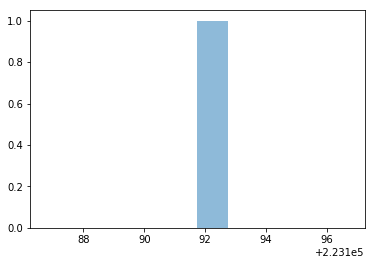

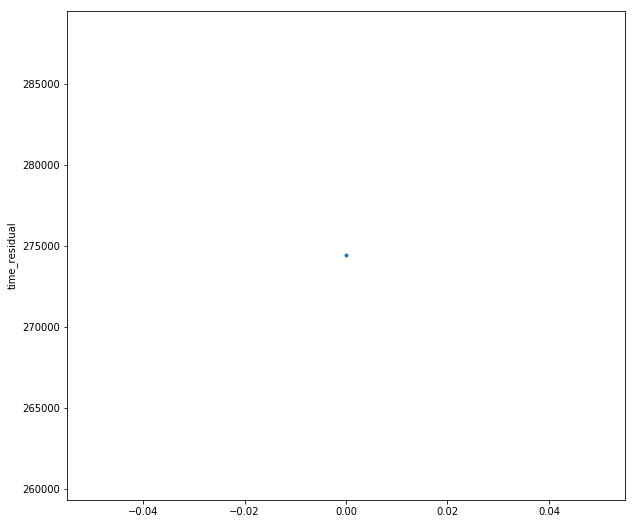

index_p 23
Jump Indices 55 56
1


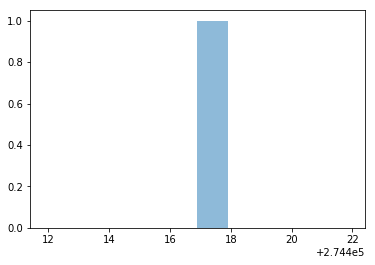

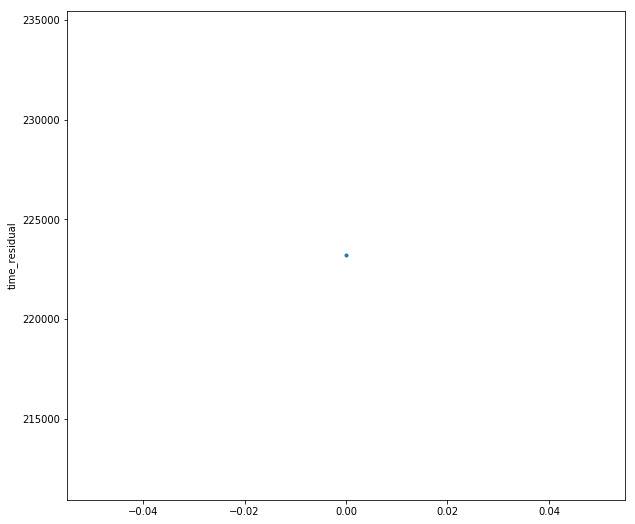

index_p 24
Jump Indices 56 58
2


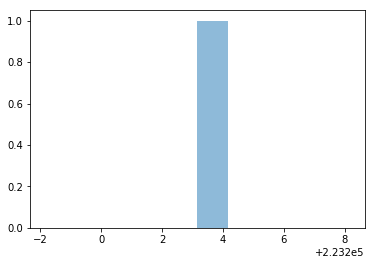

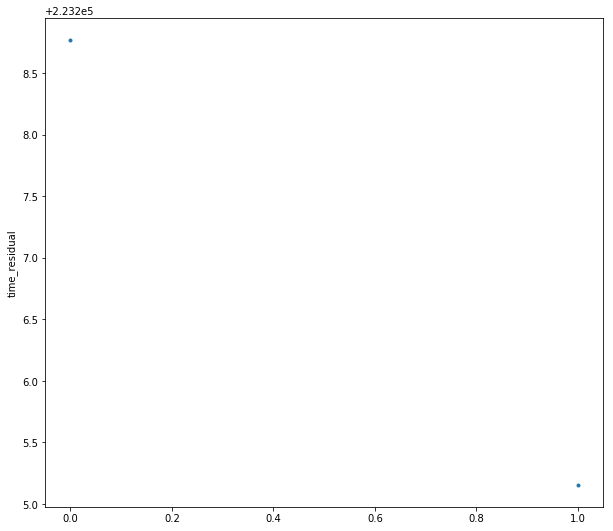

index_p 25
Jump Indices 58 59
1


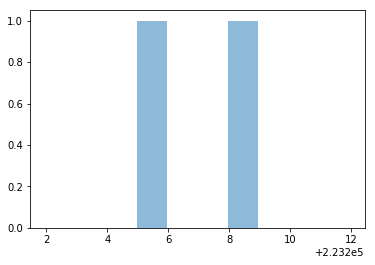

index_p 26
Jump Indices 59 60
1


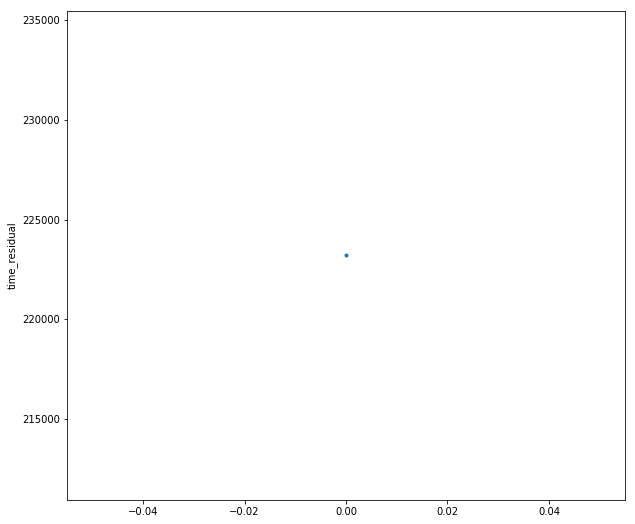

index_p 27
Jump Indices 60 61
1


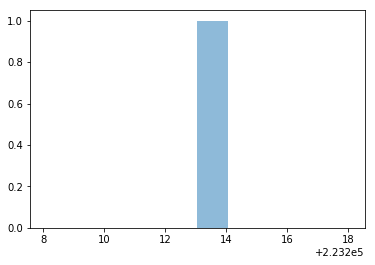

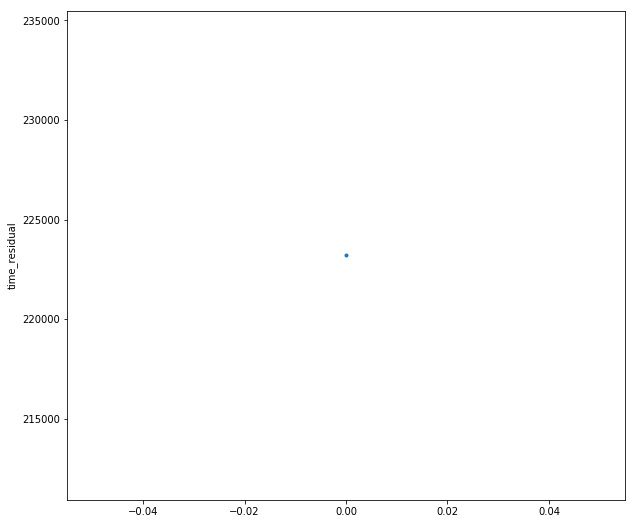

index_p 28
Jump Indices 61 62
1


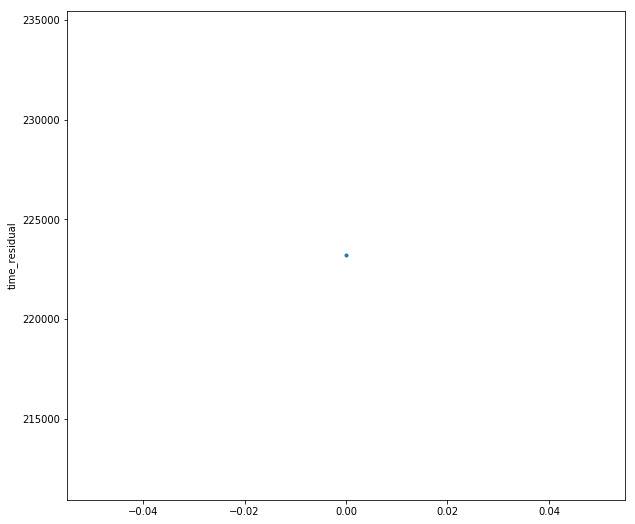

index_p 29
Jump Indices 62 64
2


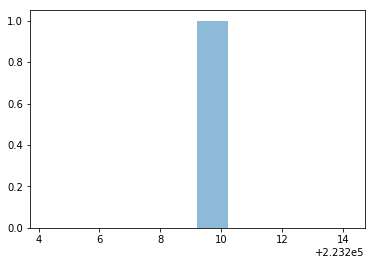

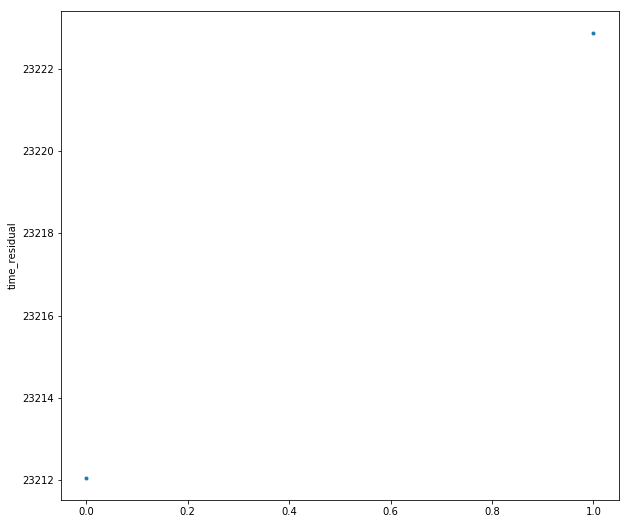

index_p 30
Jump Indices 64 65
1


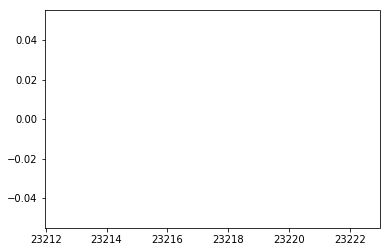

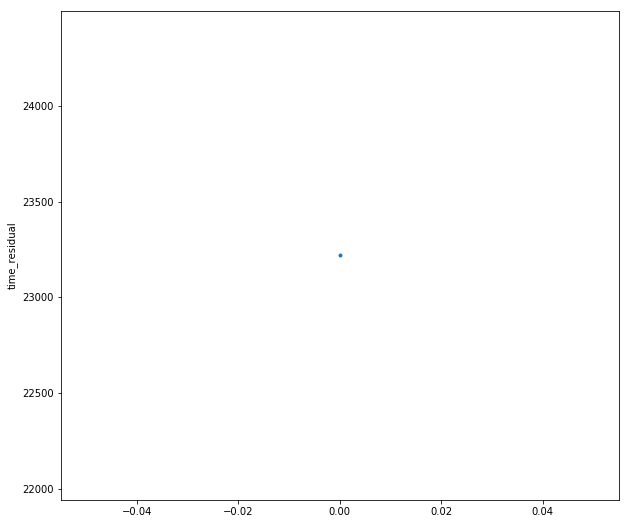

index_p 31
Jump Indices 65 66
1


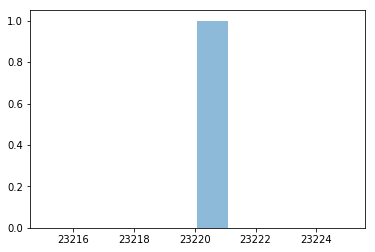

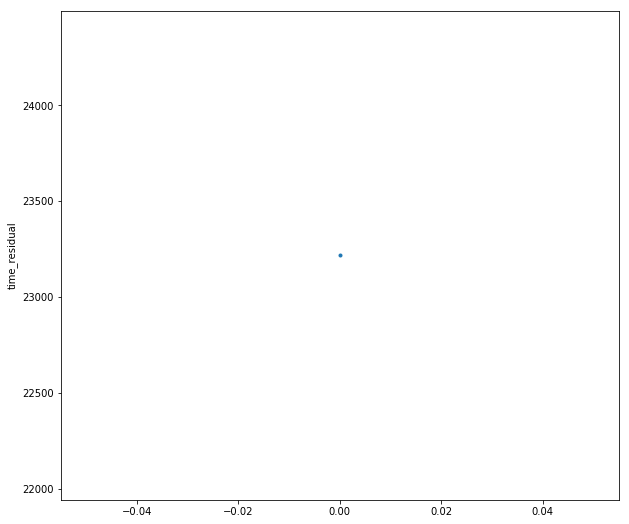

index_p 32
Jump Indices 66 67
1


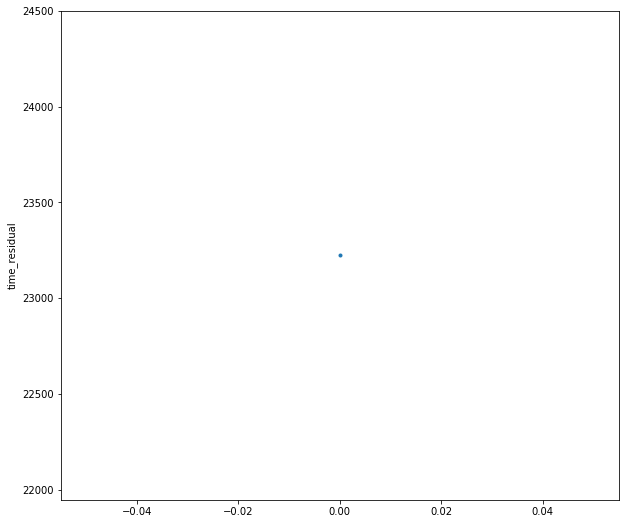

index_p 33
Jump Indices 67 68
1


index_p 34
Jump Indices 68 70
2


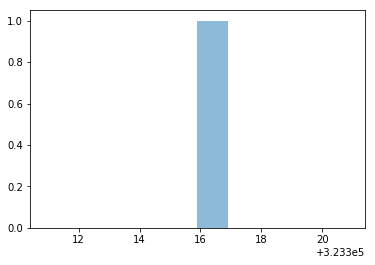

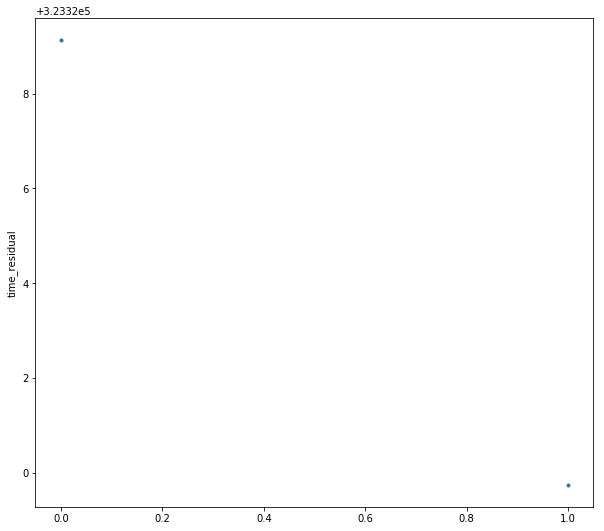

index_p 35
Jump Indices 70 71
1


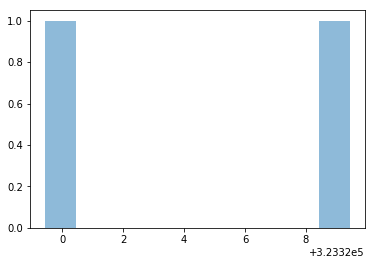

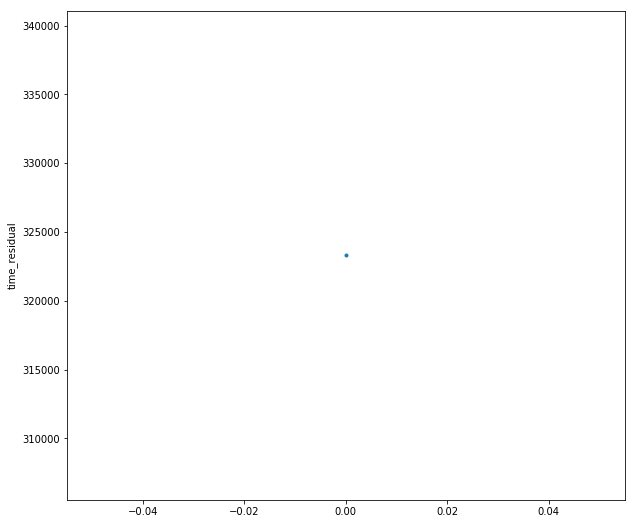

index_p 36
Jump Indices 71 73
2


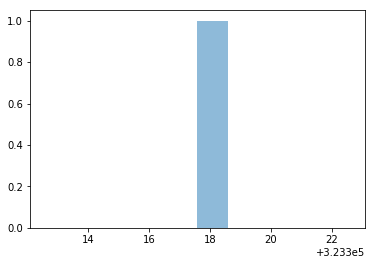

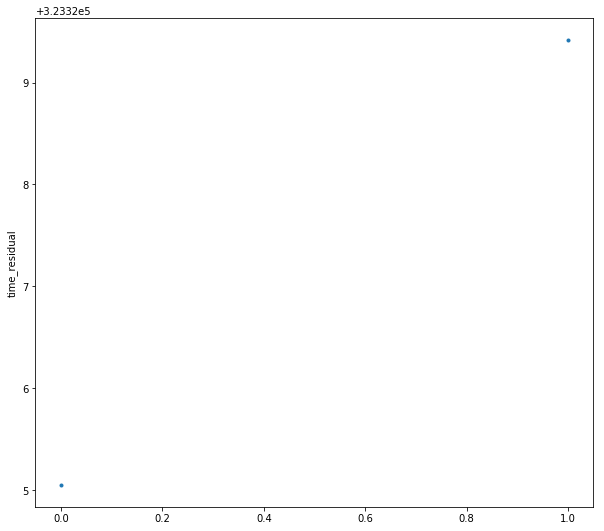

index_p 37
Jump Indices 73 76
3


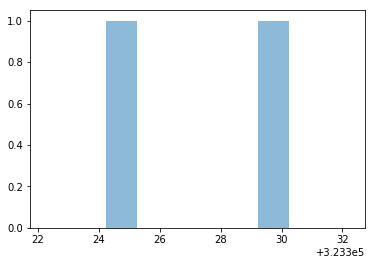

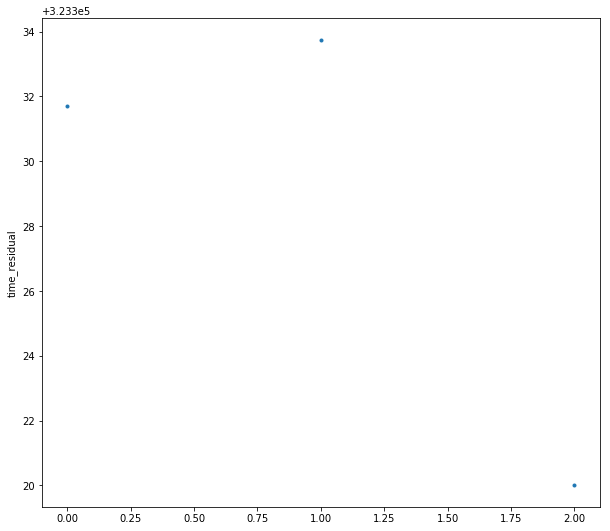

index_p 38
Jump Indices 76 77
1


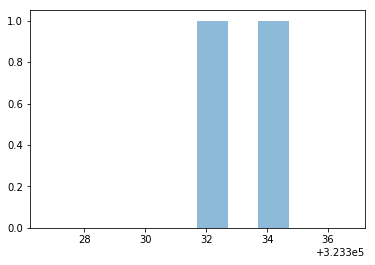

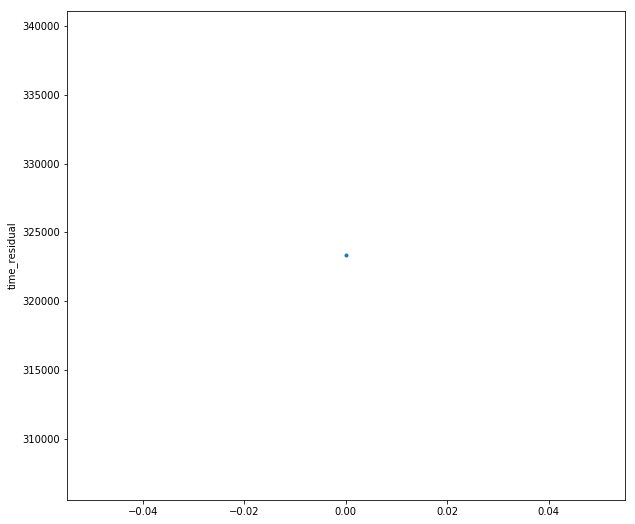

index_p 39
Jump Index size = 40 82
[77]
Jump Indices 77 82


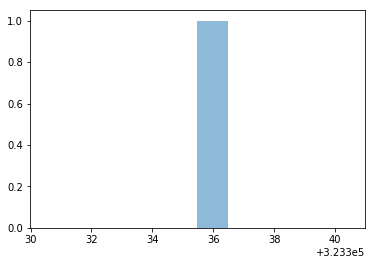

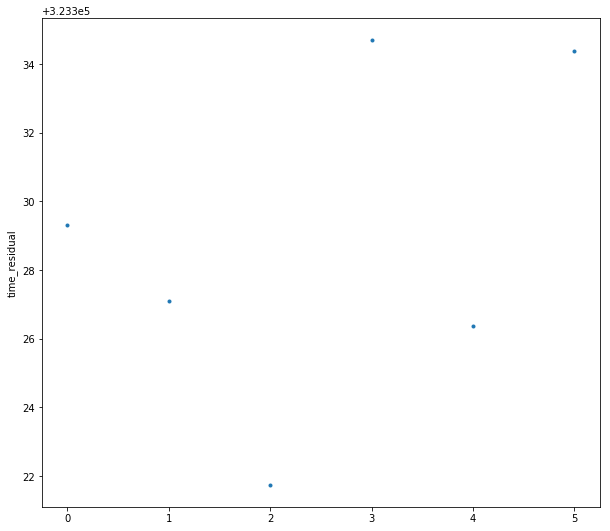

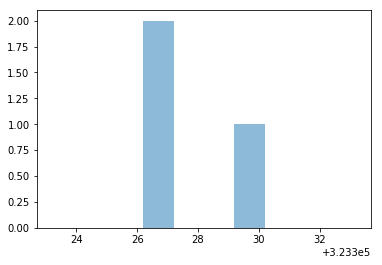

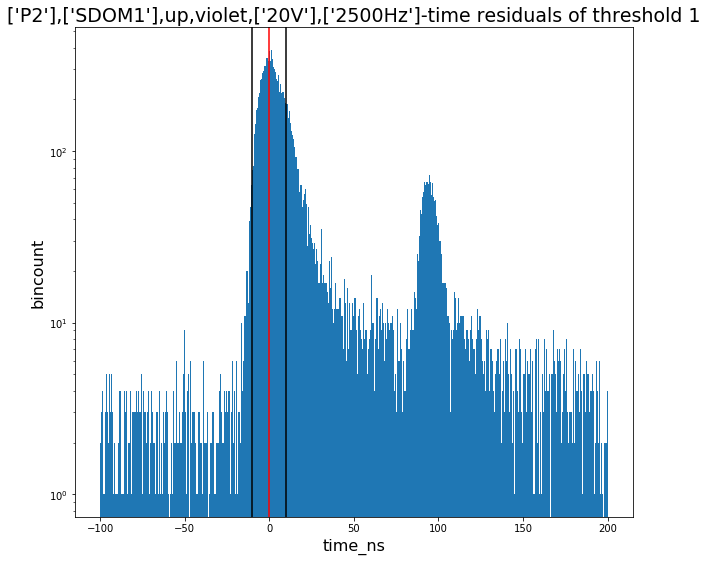

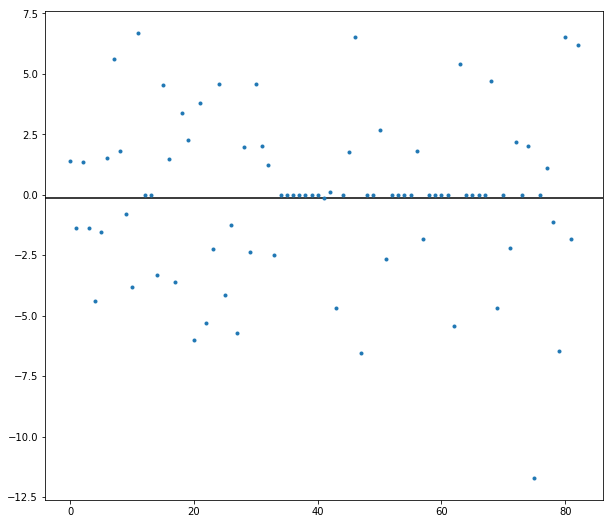

In [88]:
t_res_all1,  num_events1, noise_events1 = r1.res(gaus_peak, 250, 5)

6322349
4718194


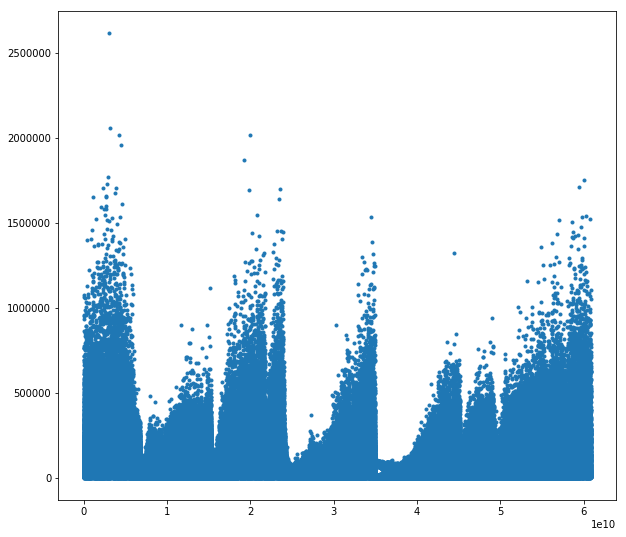

In [78]:
total_points = np.size(abs_elim_3)
print(total_points)
print(np.size(abs_elim_3[rising_1_elim_3 == 0]))
plt.figure(figsize=(10,9))
plt.plot(r1.t_threshold[:-1],np.diff(r1.t_threshold), '.')
#plt.ylim(400095, 400105)
plt.show()

#print(np.size(abs_elim_3[(rising_1_elim_3 == 0) & (falling_1_elim_3 == 0)]))
#print(np.size(abs_elim_3[falling_1_elim_3 > 0]))



# -----------------------------------------------------------
# sDOM1 HADES


In [40]:
filename = '20190514_113740_UTC_SDOM1_FLASH_HADES1_P2_violet_both_2500Hz_20V_60s_19134113751.hld_up.hdf5'
a = clean.clean(filename)

percentage of high jumps in the file - 0.0


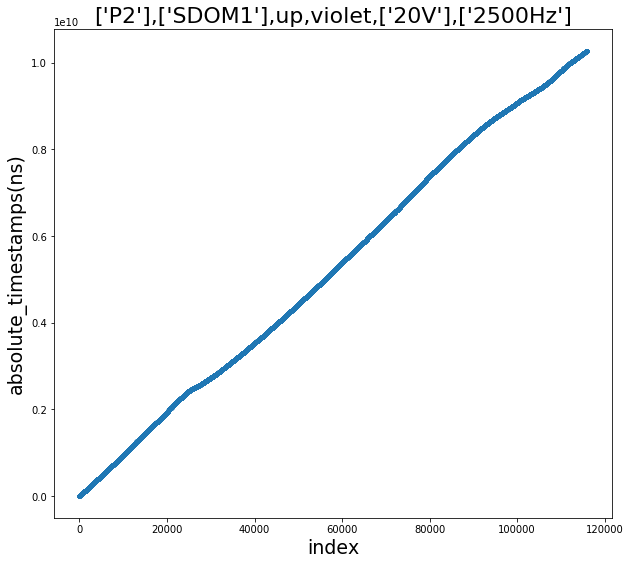

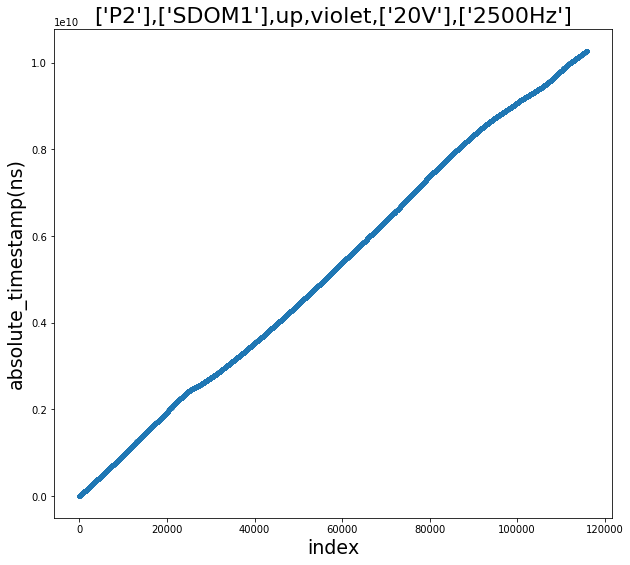

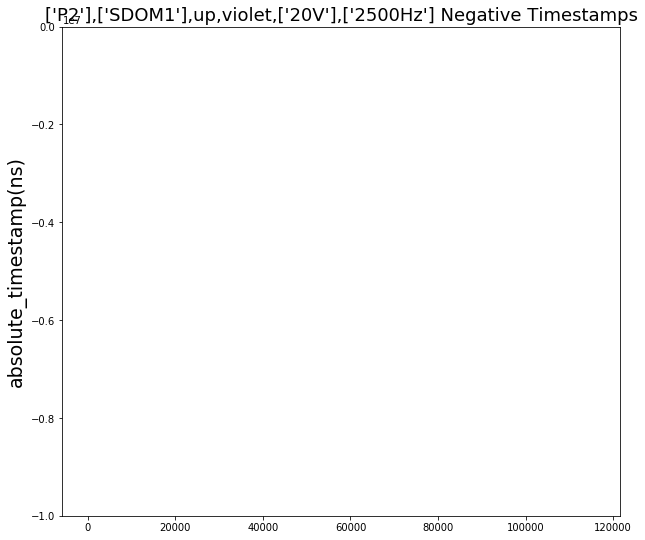

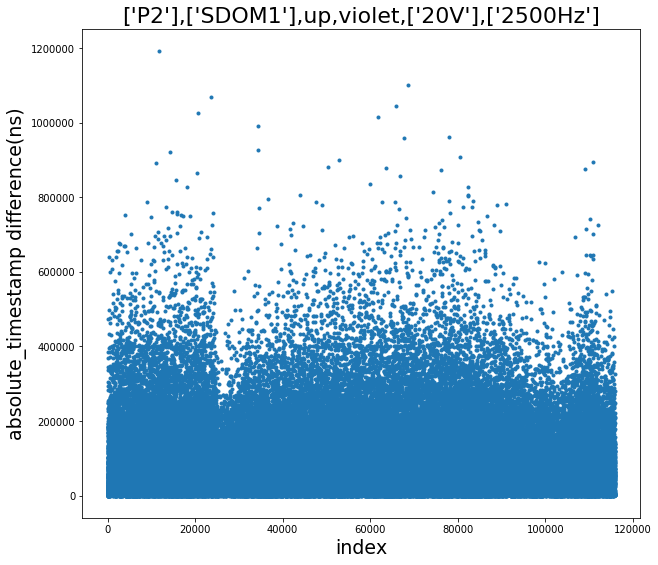

[]


0.6688614588129013


In [41]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = a.P_S_used()

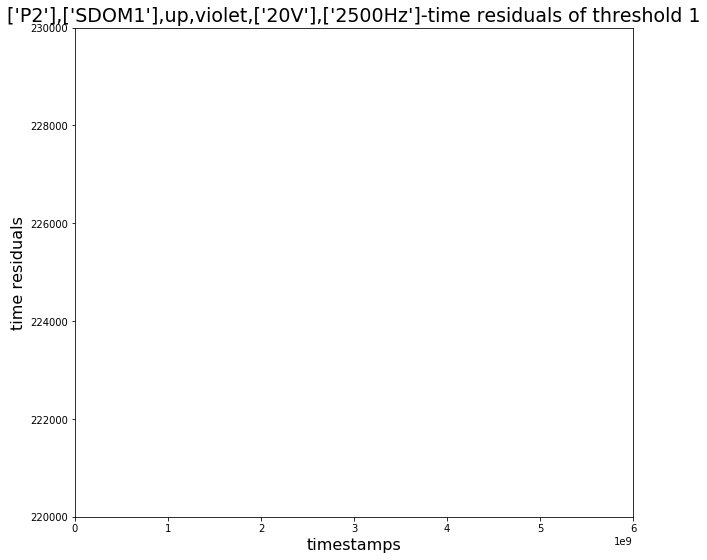

In [42]:
r1 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400105,
             0.0e10,0.6e10,220000, 230000, file_path, values, POCAM_num)

In [29]:
gaus_peak = 400100.7156722718

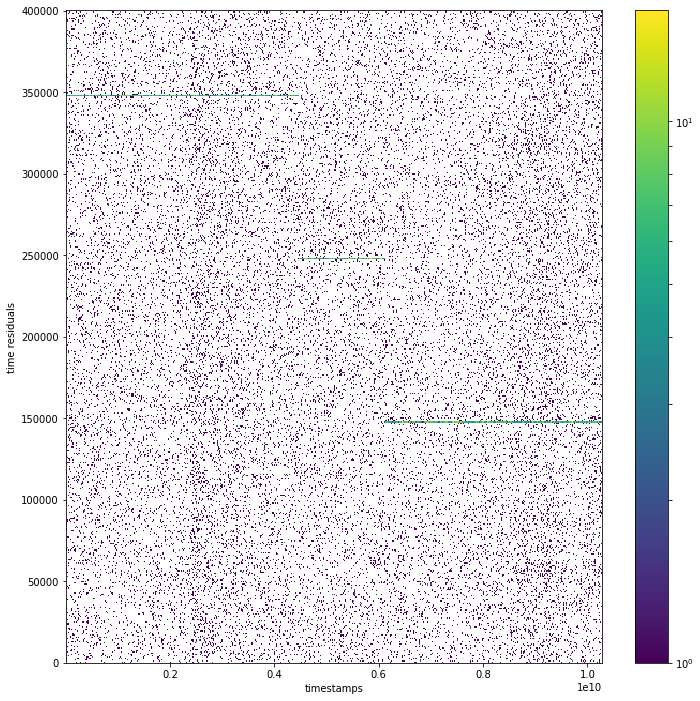

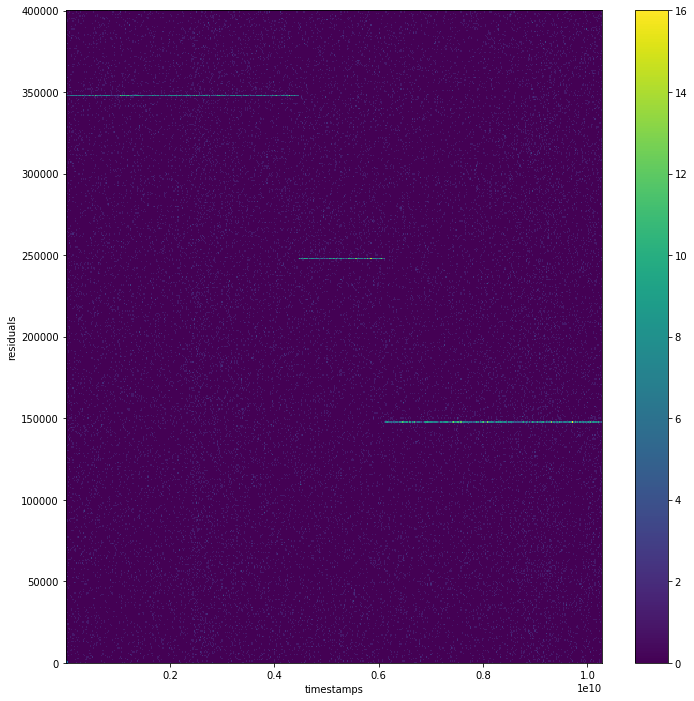

In [43]:
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r1.HIST2D(500, gaus_peak, SDOM_num)

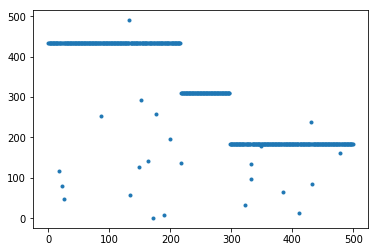

In [31]:
plt.plot(POCAM_bins, '.')

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:719: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


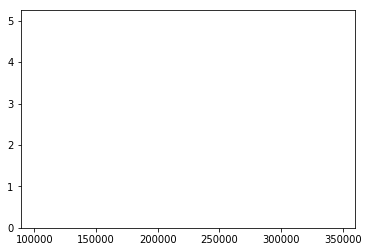

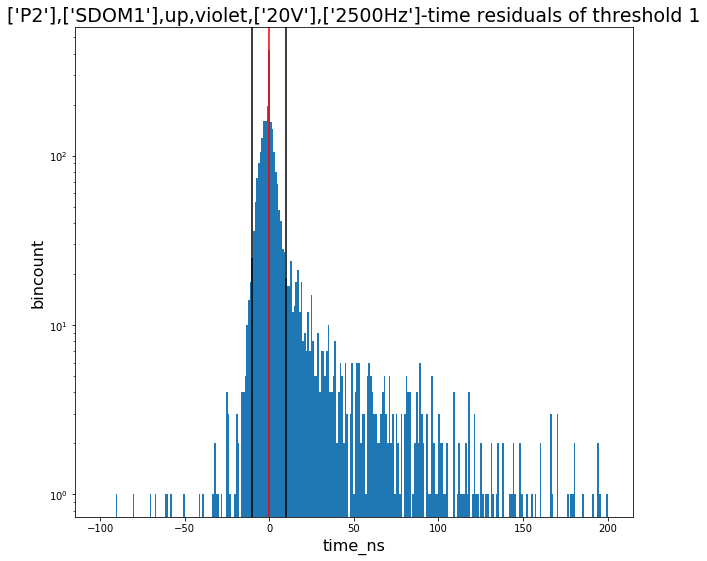

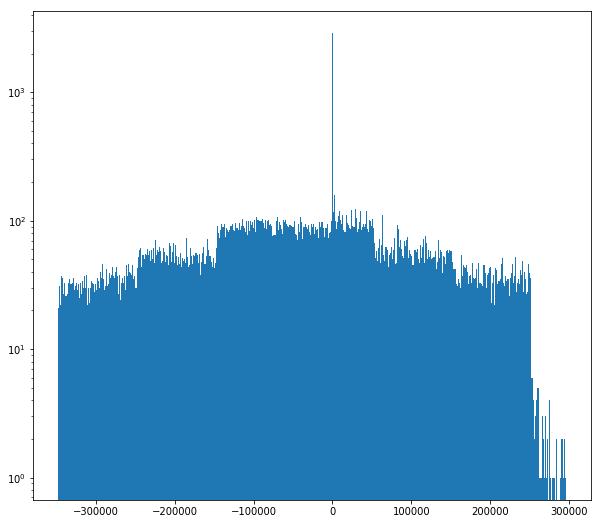

In [44]:
t_res_all1,num_events1, noise_events1 = r1.calc_res(BinsHist, 10, 2, 1)

# -----------------------------------------------------------
# sDOM5

In [127]:
## POSEIDON
filename = '20190426_085600_UTC_SDOM5_FLASH_POSEIDON1_P2_violet_both_2500Hz_20V_60s_19116085610.hld_up.hdf5'
b = clean.clean(filename)

percentage of high jumps in the file - 0.0


In [49]:
## DIONYSOS
filename = '20190430_144524_UTC_SDOM5_FLASH_DIONYSOS1_P2_violet_both_2500Hz_20V_60s_19120144534.hld_up.hdf5'
b = clean.clean(filename)

percentage of high jumps in the file - 4.147807838587349


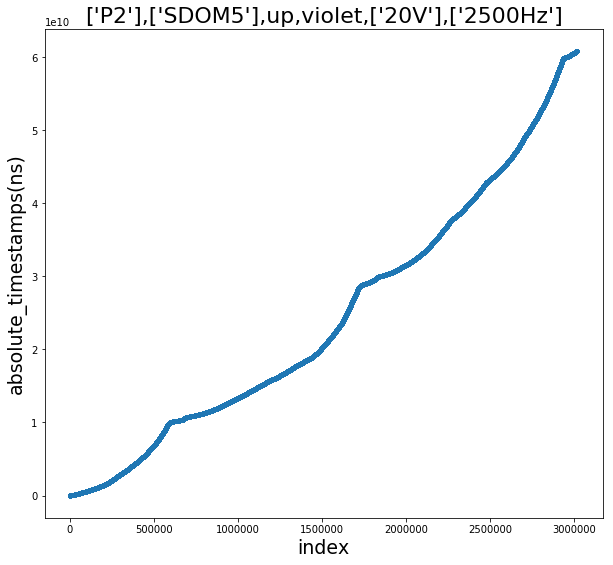

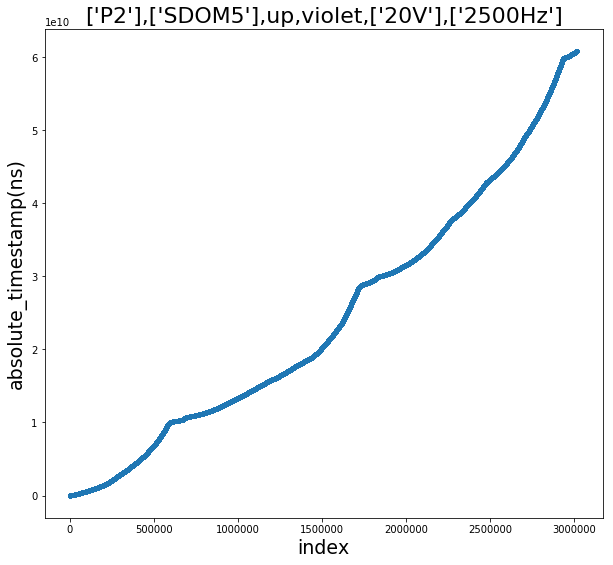

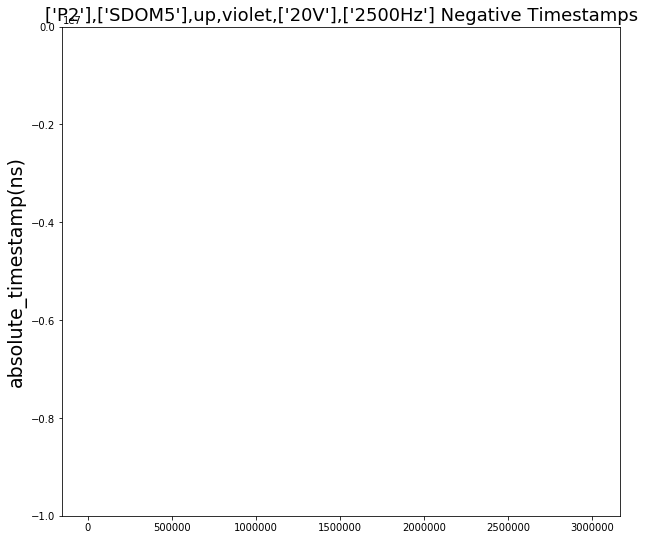

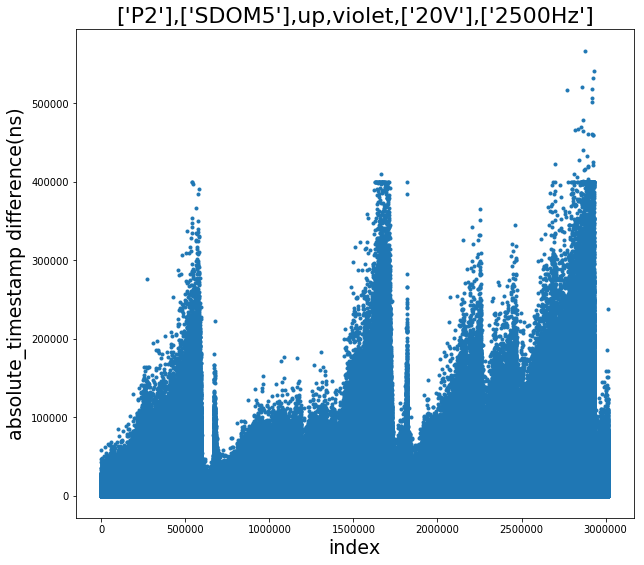

[]


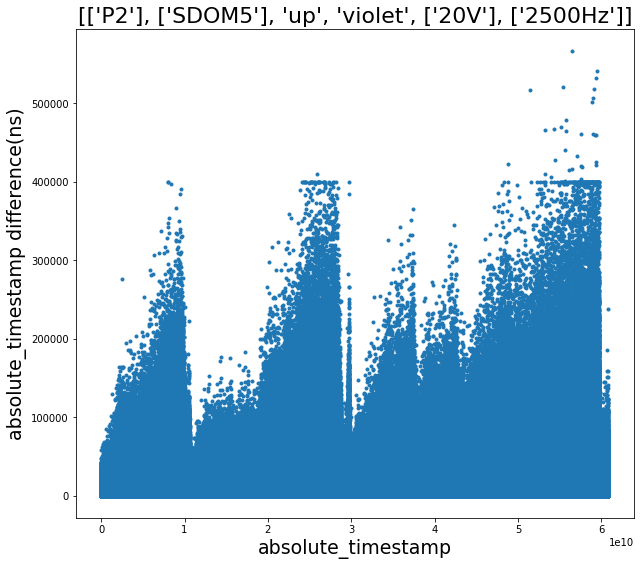

1.339065724196935


In [128]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = b.P_S_used()

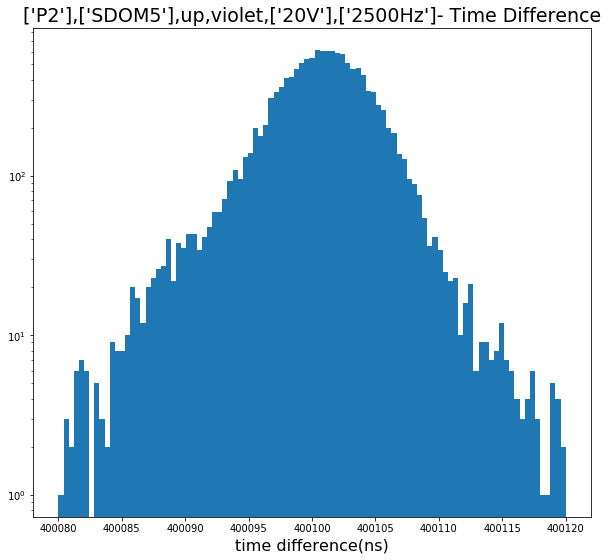

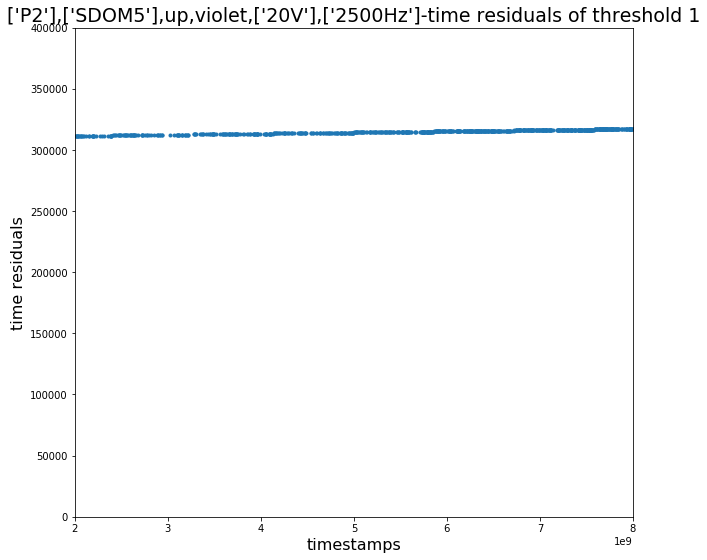

In [129]:
r2 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400105,
             0.2e10,.8e10,0, 400000, file_path, values, POCAM_num) #1.2e10,2.0e10,220000, 230000

In [109]:
#gaus_peak = r2.minimizer(2.4e10,2.7e10)
gaus_peak = r2.minimizer(.2e10,.8e10)

400100.70882851636


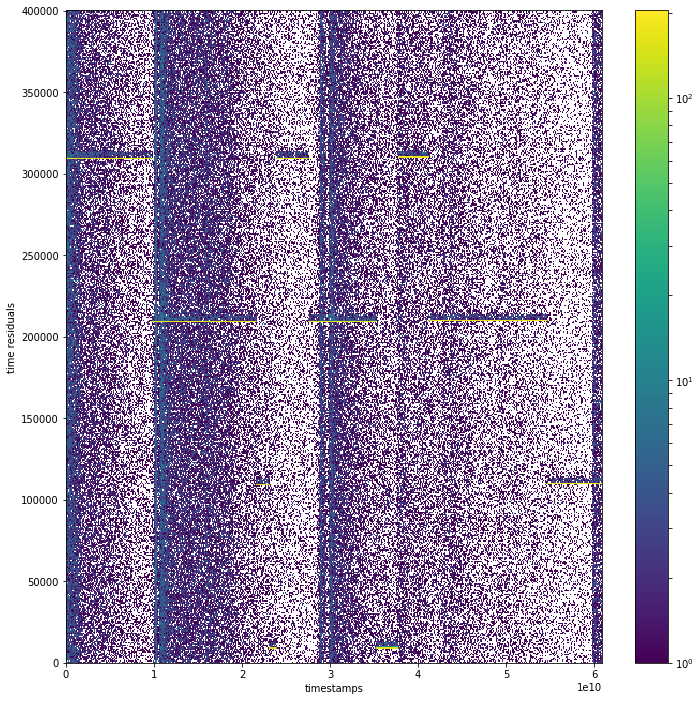

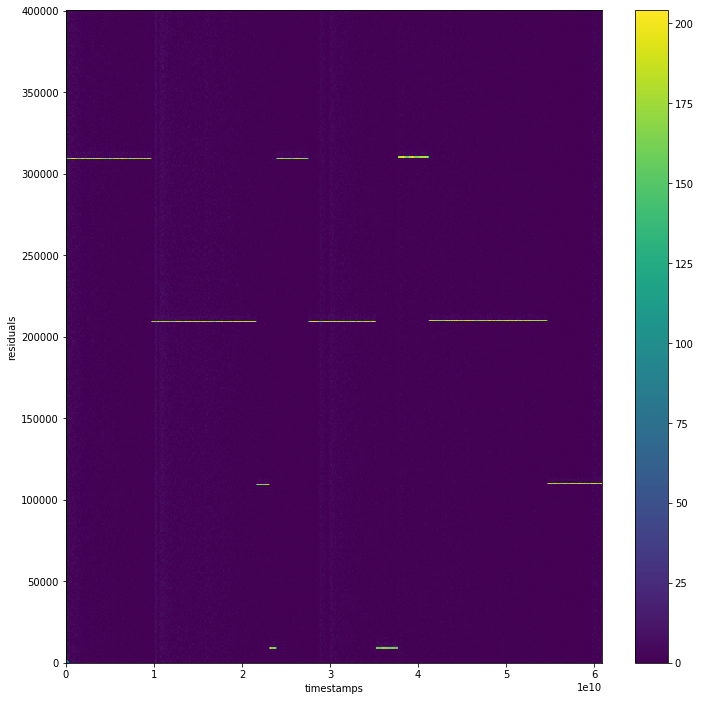

In [118]:
#gaus_peak = 400100.7120722718
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r2.HIST2D(500, gaus_peak, SDOM_num)

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:719: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


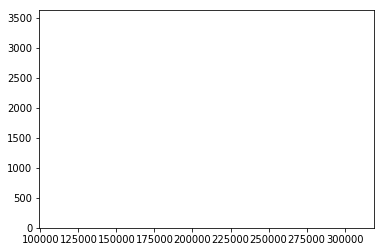

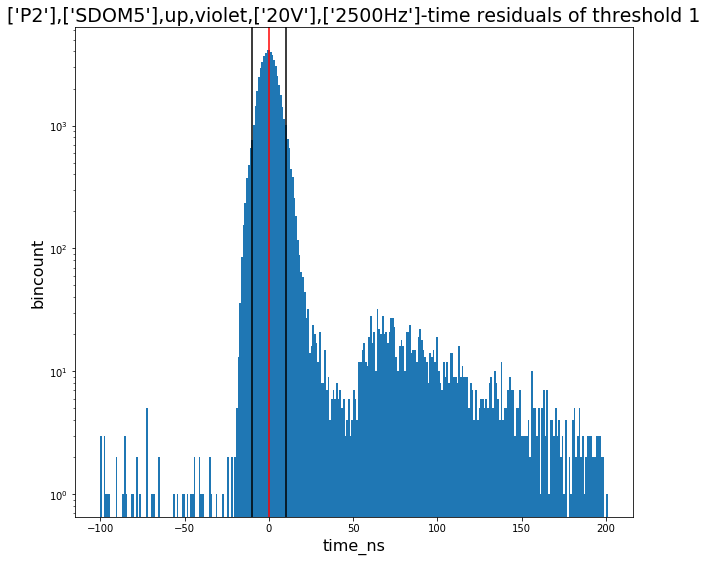

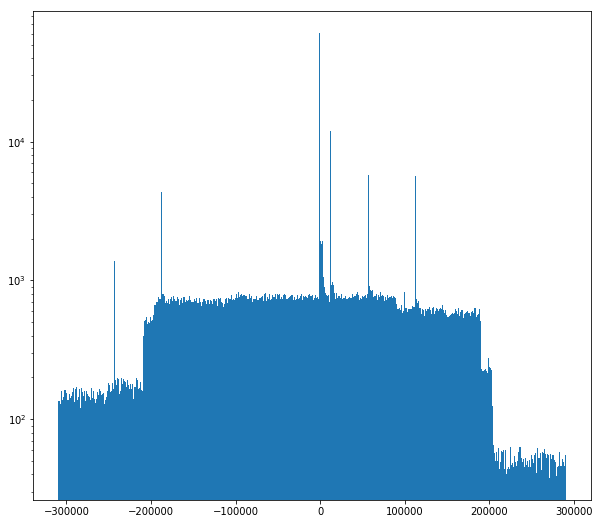

In [106]:
t_res_all2,num_events2, noise_events2 = r2.calc_res(BinsHist, 10, 5, 5)

Text(0,0.5,'time residuals')

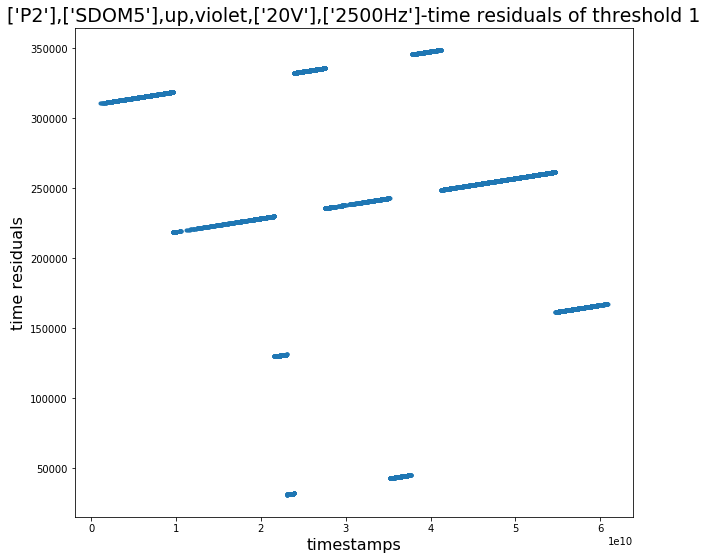

In [70]:
plt.figure(figsize=(10,9))
plt.plot(r2.events_in_peak, r2.estimate_residual, '.')
plt.title(values + '-time residuals of threshold 1', fontsize = 19)
plt.xlabel('timestamps', fontsize = 16)
plt.ylabel('time residuals', fontsize = 16)

10717
jump_index [   0. 1261. 1371. 2100. 2404. 2591. 3713. 4676. 5195. 5695. 8830.]
jump_index size 11
index_p 0
Jump Indices 0 1262
1262
400100.7088508581


index_p 1
Jump Indices 1262 1372
110
400100.70819634455


/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:719: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


index_p 2
Jump Indices 1372 2101
729
400100.70910093293


index_p 3
Jump Indices 2101 2405
304
400100.7089273911


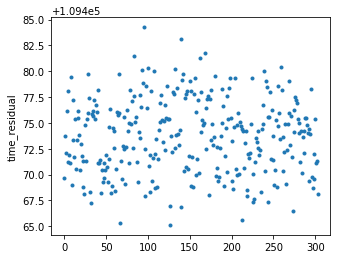

index_p 4
Jump Indices 2405 2592
187
400100.7101324871


index_p 5
Jump Indices 2592 3714
1122
400100.7093062269


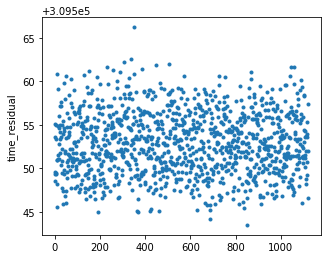

index_p 6
Jump Indices 3714 4677
963
400100.7093386536


index_p 7
Jump Indices 4677 5196
519
400100.7096667055


index_p 8
Jump Indices 5196 5696
500
400100.7095047899


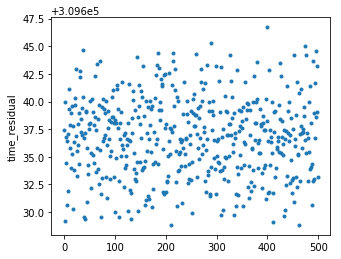

index_p 9
Jump Indices 5696 8831
3135
400100.7097711589


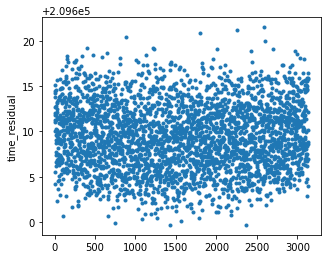

index_p 10
Jump Index size = 11 10716
[8831]
Jump Indices 8831 10716
400100.70999499236


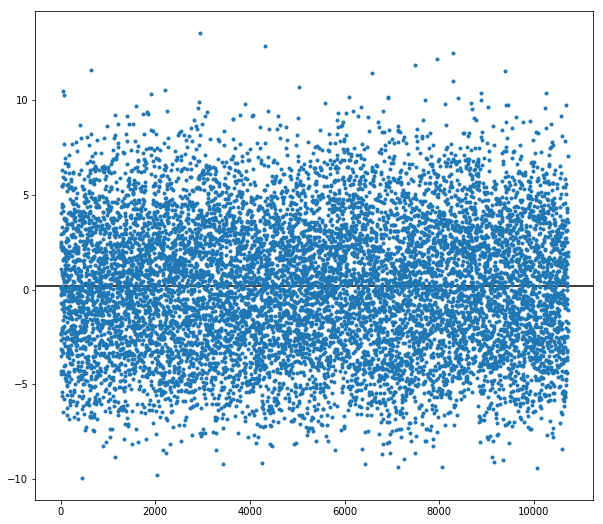

In [130]:
t_res_all2,  num_events2, noise_events2 = r2.res(gaus_peak, 500, 5)

# -----------------------------------------------------------
# sDOM2

In [156]:
filename = '20190426_085558_UTC_SDOM2_FLASH_POSEIDON1_P2_violet_both_2500Hz_20V_60s_19116085608.hld_up.hdf5'
c = clean.clean(filename)

percentage of high jumps in the file - 3.9254107454720133


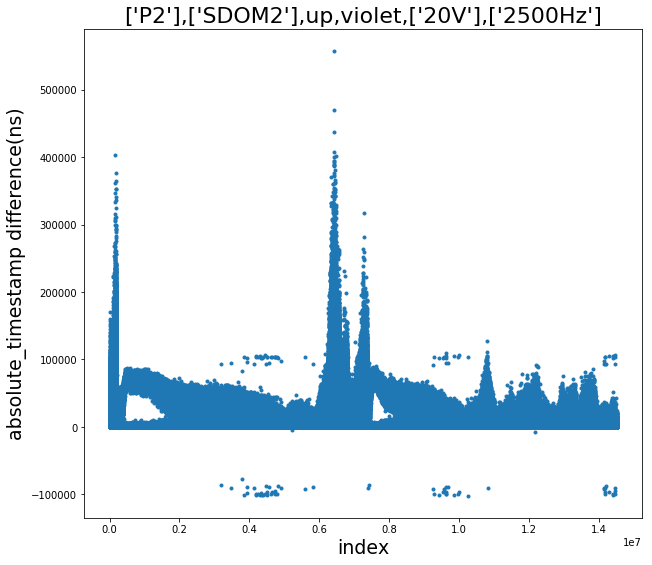

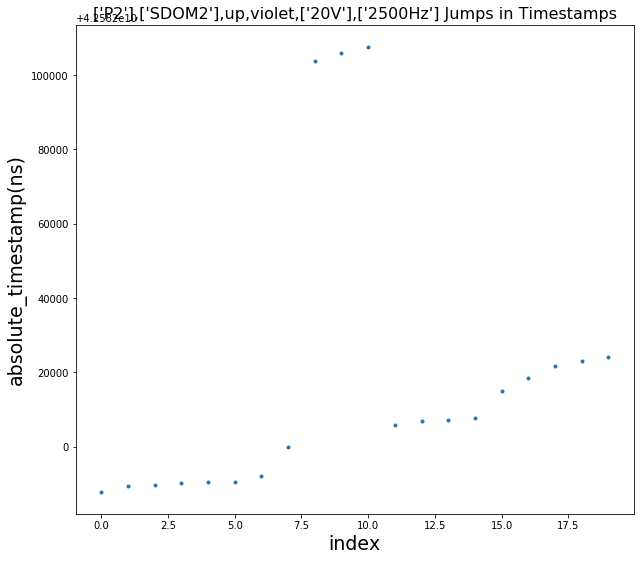

[ 3184767.  3184768.  3184769.  3184770.  3469711.  3469712.  3469713.
  3469714.  3469715.  3776833.  3776834.  3776835.  3776836.  3776837.
  3776838.  3776839.  3776840.  3776841.  3853962.  3919603.  3919604.
  3919605.  3919606.  3922032.  3922033.  3922034.  3922035.  3922036.
  4121928.  4121929.  4121930.  4121931.  4121932.  4121933.  4174042.
  4174043.  4174044.  4174045.  4174046.  4189792.  4247824.  4247825.
  4247826.  4247827.  4296996.  4296997.  4296998.  4296999.  4297000.
  4297001.  4331678.  4358262.  4358263.  4358264.  4358265.  4358266.
  4397512.  4397513.  4397514.  4397515.  4446191.  4476151.  4476152.
  4476153.  4476154.  4476155.  4476156.  4476157.  4476158.  4489727.
  4489728.  4497023.  4497024.  4559289.  4559290.  4559291.  4559292.
  4559293.  4559294.  4559295.  4614527.  4652291.  4652292.  4652293.
  4652294.  4717159.  4717216.  4717217.  4717218.  4717219.  4717220.
  4717221.  4724674.  4724675.  4781645.  4781646.  4802836.  4802837.
  4802

0.1397348937143665


In [157]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = c.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


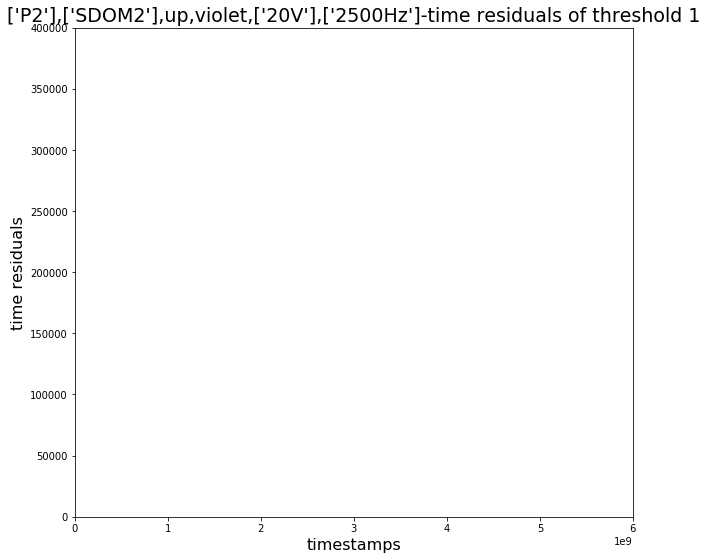

In [158]:
r3 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400105,
             0.0e10,0.6e10,0, 400000, file_path, values, POCAM_num)

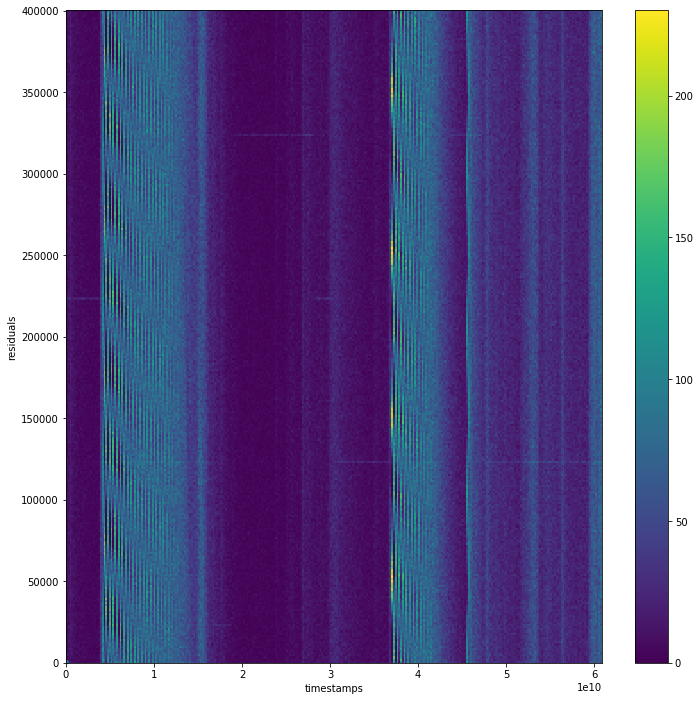

In [176]:
gaus_peak = 400100.7156722718
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r3.HIST2D(300, gaus_peak, SDOM_num)

[  1   6   7   8   9  10  11  12  13  14  15  16  17  22  65  67  79  83
  85  90  91  92  93  97  98  99 100 101 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 127 128 129 130 132 133 134
 135 136 137 141 145 146 147 148 155 156 159 160 161 164 165 166 169 170
 171 172 173 174 175 176 177 178 179 180 182 207 223 236 237 240 246 249
 251 253 260 261 268 283 290 291 292 298]
100


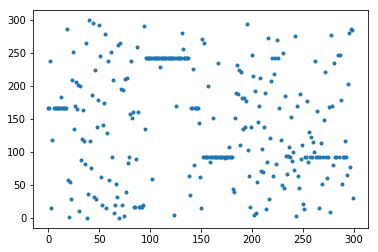

In [218]:
time_window1 = [((abs_elim_3>0.5e10) & (abs_elim_3<1.6e10))]
time_window2 = [((abs_elim_3>3.1e10) & (abs_elim_3<4.2e10))] 
time_window3 = [((abs_elim_3>4.8e10) & (abs_elim_3<6.0e10))] 
time_window4 = [((abs_elim_3>1.9e10) & (abs_elim_3<2.8e10))] 
time_window5 = [((abs_elim_3>0.0e10) & (abs_elim_3<0.4e10))] 

plt.plot(POCAM_bins, '.')
print(JumpIndex)
print(np.size(JumpIndex))


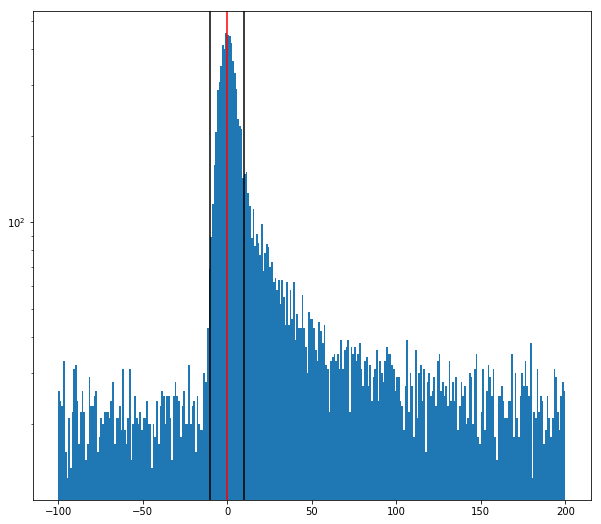

In [240]:
## Plotting POCAM residuals by eye

gaus_peak = 400100.7156722718
my_data_all = np.array([])

my_slice = (abs_elim_3+rising_1_elim_3)[time_window1] 
my_res = (my_slice%gaus_peak) - 223260+100000+198
my_data_all = np.append(my_data_all, my_res)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window2]
my_res = (my_slice%gaus_peak) - 223260+100000+89
my_data_all = np.append(my_data_all, my_res)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window3] 
my_res = (my_slice%gaus_peak) - 223260+100000-42
#my_data_all = np.append(my_data_all, my_res)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window4]
my_res = (my_slice%gaus_peak) - 223260-100000-46+142
my_data_all = np.append(my_data_all, my_res)

my_slice = (abs_elim_3+rising_1_elim_3)[time_window5]
my_res = (my_slice%gaus_peak) - 223260-46+240.5
my_data_all = np.append(my_data_all, my_res)

fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_data_all,bins=300,log=True, range=(-100,200) )
ax.axvline(color='r')
ax.axvline(-10,color='k')
ax.axvline(10,color='k')

total_time = (abs_elim_3[-1]-abs_elim_3[0])
time_used = ((1.6-0.5) + (4.2-3.1) + (2.8-1.9) + (0.4))*1e10
time_correction = time_used / total_time

# save to csv
path = 'Data/POSEIDON1/Measured_arrival_times/'
filename = "['P2'],['SDOM2'],up,violet,['20V'],['2500Hz'].csv"
with open(path+filename, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(bins[:-1])
    writer.writerow(n/time_correction)
csvfile.close()

#fig, ax = plt.subplots(figsize=(10,9))
#_ = ax.hist(my_res,bins=300,log=True)



# -----------------------------------------------------------
# sDOM3

In [134]:
filename = '20190426_085559_UTC_SDOM3_FLASH_POSEIDON1_P2_violet_both_2500Hz_20V_60s_19116085609.hld_up.hdf5'
d = clean.clean(filename)

percentage of high jumps in the file - 15.30466833628788


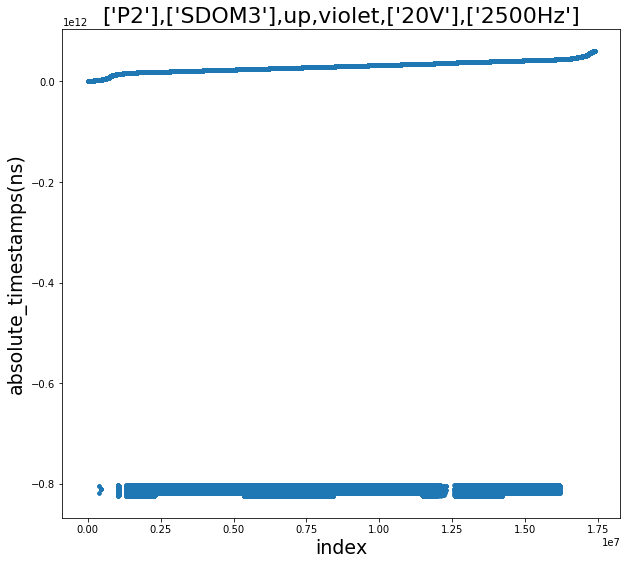

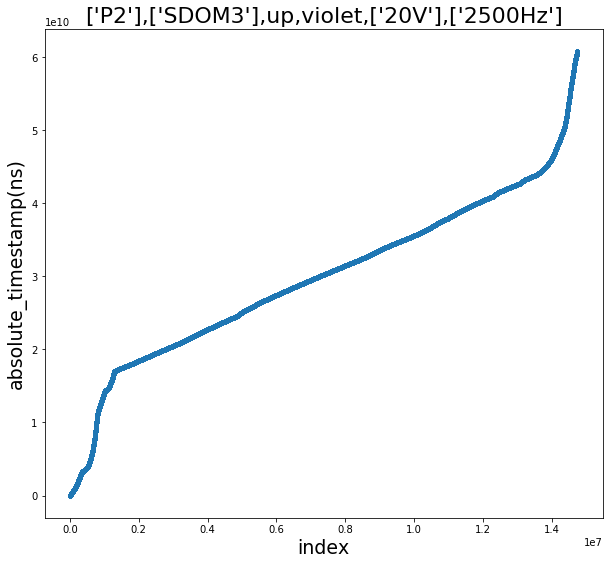

[ 1058160.  9721528.  9743292.  9743293.  9743294.  9743295.  9743296.
  9743297.  9748794.  9748795.  9748796.  9797811.  9797812.  9797813.
  9797814.  9797815.  9797816.  9846682.  9871238.  9871239.  9934396.
  9934397.  9934398.  9934399.  9934453.  9934454.  9934455.  9934456.
  9934457.  9934458.  9937254.  9937255.  9937256.  9937257.  9937258.
  9937259.  9937260.  9937261.  9944704.  9944705.  9944706.  9944707.
  9975294.  9977735.  9977792.  9977793.  9981291.  9981292.  9981293.
 10001037. 10105877. 10105878. 10105879. 10147169. 10147170. 13487617.
 13487618. 13487619.]


0.5402122957256188


In [241]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT) = d.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


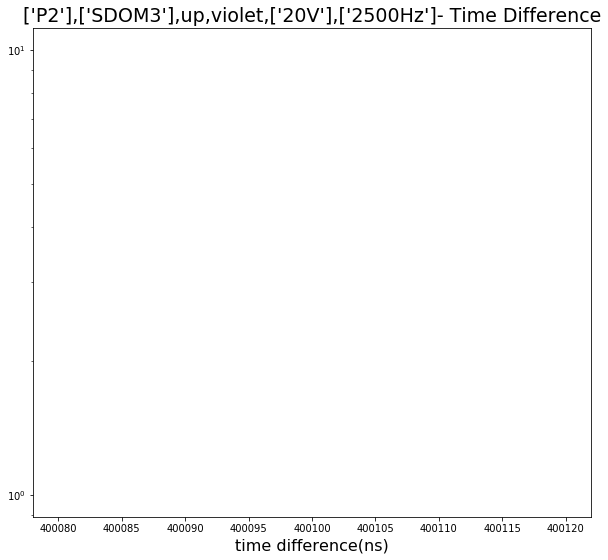

In [48]:
r4 = residual.residual(abs_elim_3,rising_1_elim_3,400080, 400120, 100, 
                                400095, 400105,
             0.0e10,6e10,0, 400000, file_path, values, POCAM_num)

In [52]:
#gaus_peak = r4.minimizer(5.1e10,6e10)
#gaus_peak = r4.minimizer(4.5e10,5e10)
gaus_peak = 400100.71
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r4.HIST2D(400, gaus_peak, SDOM_num)

In [55]:
#plt.plot(POCAM_bins, '.')
print(r4.JumpIndex) # bin 223


[ 32  42  45  46  48  49  50  64  72  73  82  84  93 100 112 280 290 291
 292 295 296 297 299 310 312 317 329 334 335 344 352 361 370 390]


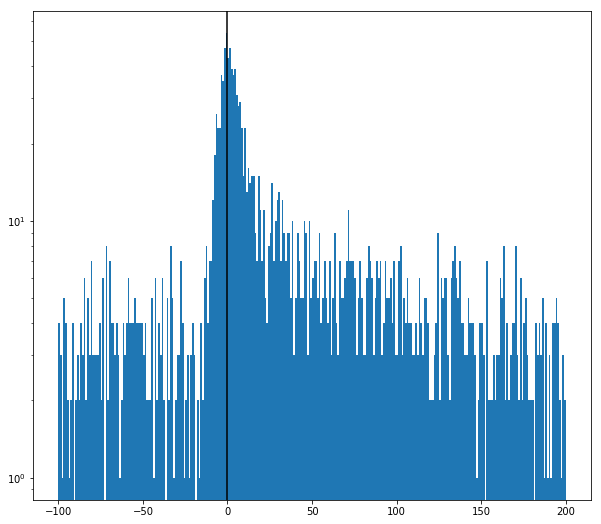

In [242]:
## POCAM signal (plot by eye)

my_slice = (abs_elim_3+rising_1_elim_3)[:1400000]
gaus_peak = 400100.7156722718 #400100.7156722718
my_res = my_slice%gaus_peak
my_res = my_res - 223260

fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_res,bins=300,log=True, range=(-100,200) )
ax.axvline(color='k')

time_correction = (abs_elim_3[1400000]-abs_elim_3[0]) / (abs_elim_3[-1]-abs_elim_3[0])

# save to csv
path = 'Data/POSEIDON1/Measured_arrival_times/'
filename = "['P2'],['SDOM3'],up,violet,['20V'],['2500Hz'].csv"
with open(path+filename, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(bins[:-1])
    writer.writerow(n/time_correction)
csvfile.close()

#fig, ax = plt.subplots(figsize=(10,9))
#_ = ax.hist(my_res,bins=300,log=True)





14662754
128397


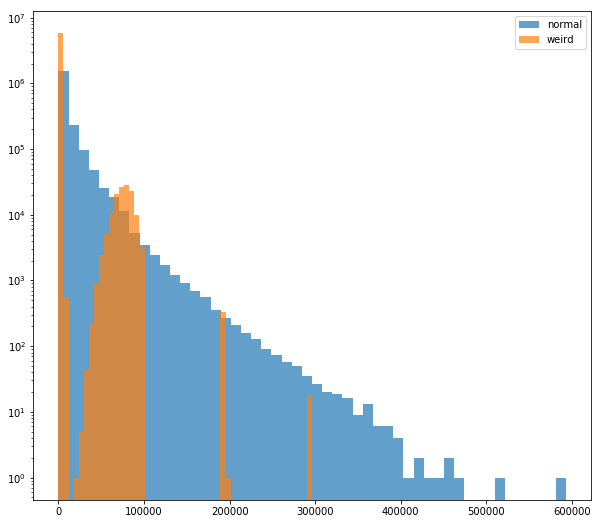

In [101]:
total_events = abs_elim_3.size
print(total_events)
weird_shape_slice = abs_elim_3[2000000:8000000]
normal_slice = abs_elim_3[0:2000000]

#print(weird_shape_slice.size/total_events)

diff = np.diff(weird_shape_slice)
diff_slice = diff[(diff<100000) & (diff>50000)]
print(diff_slice.size)

diff_normal = np.diff(normal_slice)

fig, ax = plt.subplots(figsize=(10,9))
ax.hist(diff_normal,bins=50,log=True,alpha=.7,label='normal')
n,bins,patches = ax.hist(diff,bins=50,log=True,alpha=.7,label='weird')
ax.legend()


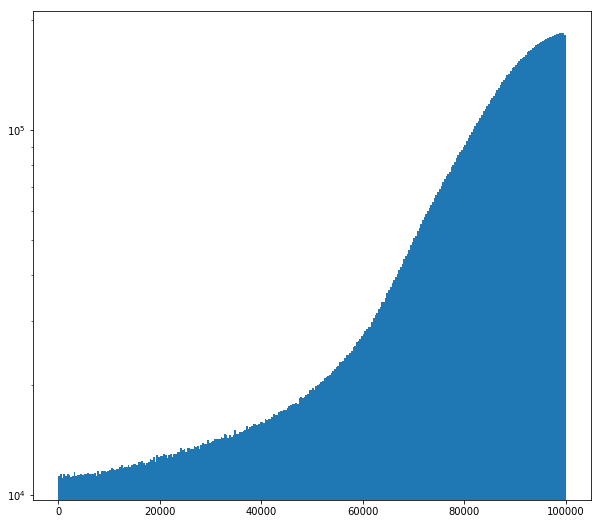

In [136]:
## other weird signal 

#my_slice = abs_elim_3[:1400000]
#my_slice = abs_elim_3[2000000:8000000]
my_slice = abs_elim_3
gaus_peak = 100000 # 10kHz
my_res = my_slice%gaus_peak

fig, ax = plt.subplots(figsize=(10,9))
_ = ax.hist(my_res,bins=300,log=True)